# Objectives:

# Loading libraries
Loading the libraries I will need and suppressing the warnings, as per advice from classes.

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set(color_codes=True) 
import sklearn.preprocessing as preproc
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics as stats
from scipy.stats import poisson
from scipy.stats import binom
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
import math

import warnings
warnings.filterwarnings('ignore')

## Data Analysis-
Basic EDA analysis on two datasets.


In [8]:
#Setting the views to inspect large Dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#Importing two Dataset and preform EDA analysis.
df_app = pd.read_csv('application_data.csv')
df_pre = pd.read_csv('previous_application.csv')

## Analysing first dataset 'Application data'

In [10]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [11]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
df_app.shape

(307511, 122)

In [14]:
#Checking datatypes and unique values of application dataset
dataT=pd.DataFrame(df_app.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_app.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,LIVE_CITY_NOT_WORK_CITY,2,int64
1,FLAG_DOCUMENT_18,2,int64
2,FLAG_DOCUMENT_14,2,int64
3,FLAG_MOBIL,2,int64
4,FLAG_EMP_PHONE,2,int64
5,FLAG_WORK_PHONE,2,int64
6,FLAG_CONT_MOBILE,2,int64
7,FLAG_PHONE,2,int64
8,FLAG_EMAIL,2,int64
9,FLAG_DOCUMENT_15,2,int64


# Analysing Second dataset 'previous_application' Dataset.

In [15]:
df_pre.shape

(1670214, 37)

In [16]:
df_pre.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Checking datatypes and unique values of application dataset
dataT=pd.DataFrame(df_pre.nunique(),columns=['Unique_Values']).reset_index()
uniq=pd.DataFrame(df_pre.dtypes,columns=['dtypes']).reset_index()
res=pd.merge(dataT,uniq,on='index').sort_values(by=['Unique_Values']).reset_index(drop=True)
res

,index,Unique_Values,dtypes
0,NFLAG_INSURED_ON_APPROVAL,2,float64
1,NFLAG_LAST_APPL_IN_DAY,2,int64
2,FLAG_LAST_APPL_PER_CONTRACT,2,object
3,NAME_PRODUCT_TYPE,3,object
4,NAME_CLIENT_TYPE,4,object
5,NAME_CONTRACT_STATUS,4,object
6,NAME_PAYMENT_TYPE,4,object
7,NAME_CONTRACT_TYPE,4,object
8,NAME_PORTFOLIO,5,object
9,NAME_YIELD_GROUP,5,object


# Basic Data Exploration Results:

## Visual Exploratory Data Analysis

on 1st Dataset - application_data.csv

In [18]:
#Corrrection mapping for 1st dataset features
corr_app1=corr_app=df_app[['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_REQ_CREDIT_BUREAU_HOUR',
               'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_INCOME_TYPE',
               'CNT_CHILDREN','OCCUPATION_TYPE','AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE',
               'AMT_CREDIT','DAYS_EMPLOYED','AMT_ANNUITY','DAYS_BIRTH','NAME_TYPE_SUITE']]

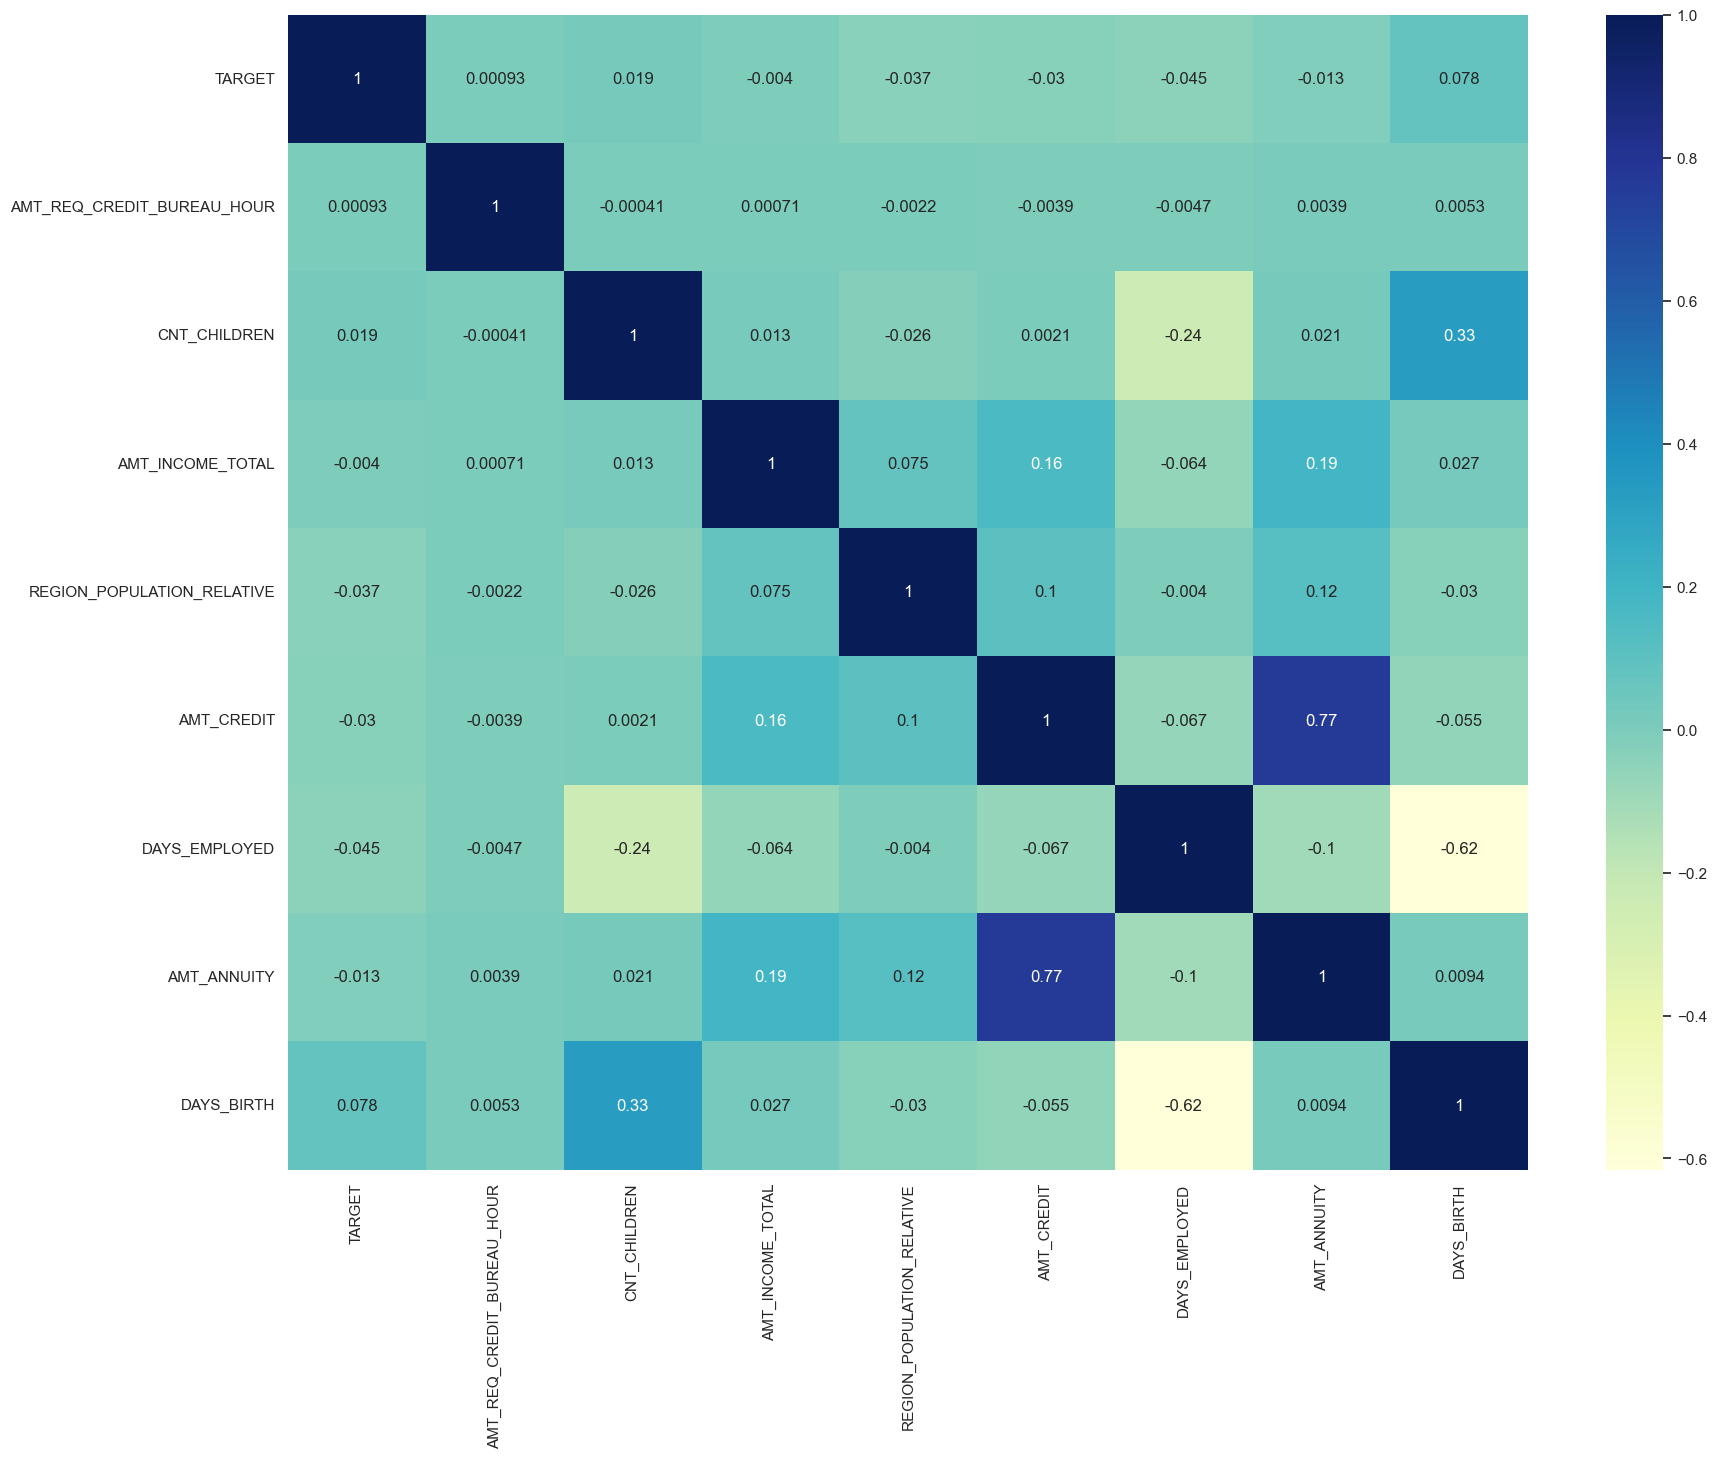

In [19]:
#Plotting a heatmap to see correlations
plt.figure(figsize=(20,15))
sns.heatmap(corr_app1.corr(),cmap="YlGnBu",annot=True)
plt.show()

Observations:

Credit and Annuity amount has the highest correlation.
Days_Employed is less correlational with Number of Children(CNT_CHILDREN) and Age.
target doesn't show strong correlation among any features present in 1st dataset.

 ## Visual Exploratory Data Analysis
   
    Summary of distributions of categorical variables are analyzed using bar charts. 
    These charts help in deriving a general idea of various characteristics of the population who avail loan.

## Single Variable analysis:

# Categorial:

In [20]:
def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

Binning Continuous Value
Binning of age and Income is done for analytical efficiency by classifying them in specific intervals.

In [21]:
#1.age
df_app['AGE_GROUP']=pd.cut((df_app.DAYS_BIRTH.abs()/365),[0,30,40,50,60,70],labels=['<30','30-40','40-50','50-60','60-70'])

In [22]:
#2.INCOME
df_app['INCOME_GROUP']=pd.cut(df_app.AMT_INCOME_TOTAL,[0,100000,200000,500000,1000000,117000000],
                           labels=['Upto 1L','1L-2L','2L-5L','5L-10L','more than 10L'])

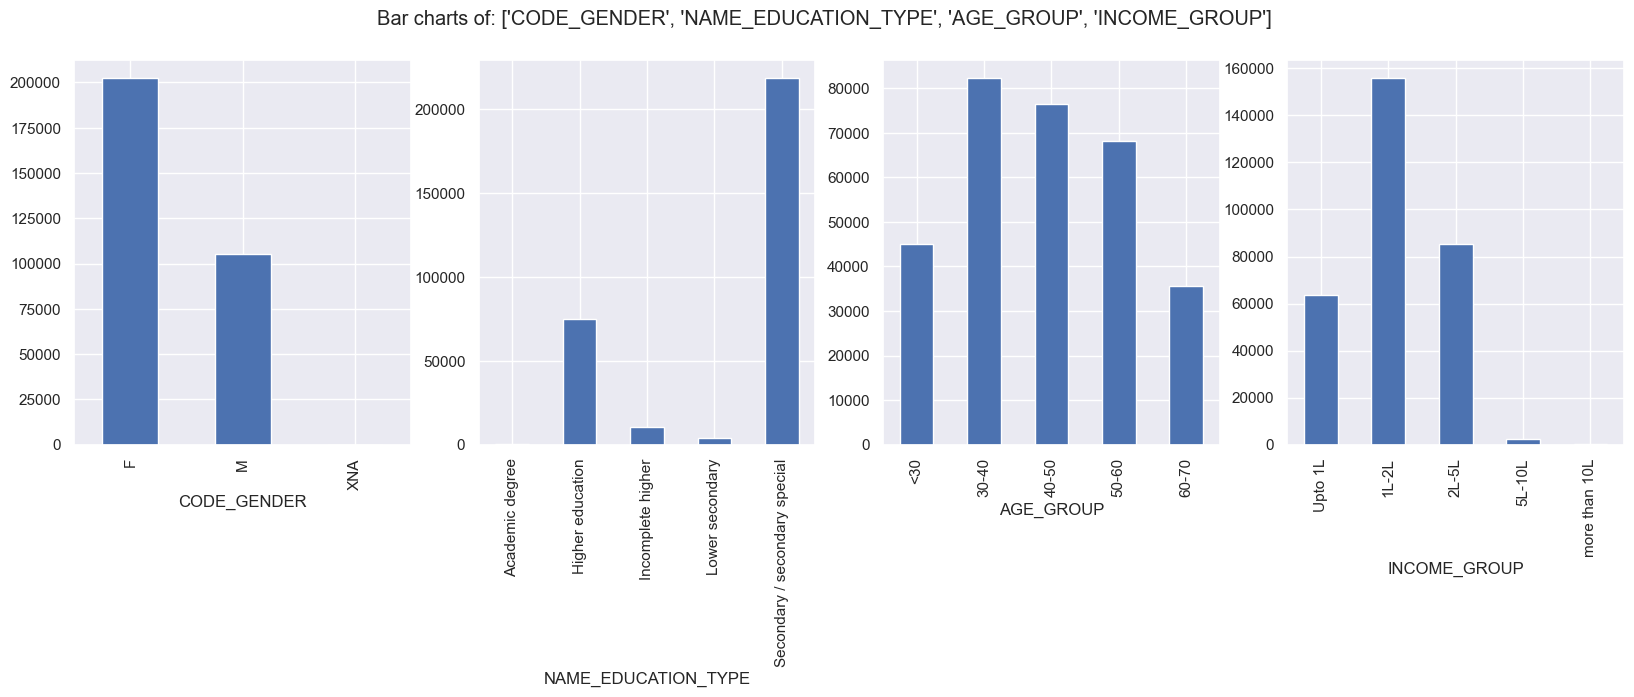

In [23]:
PlotBarCharts(inpData=df_app, colsToPlot=['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'AGE_GROUP','INCOME_GROUP']);

Observation:
.Females are the majority availers of loan when compared with men.
.Secondary education category is the highest availers of loan.
.30-40 age group are the highest availers of loan and 60-70 age group is the lowest.


## Bivariate Analysis¶

In [24]:
def bivariate_scatter(variable_x, variable_y,label_orientation=False):
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
    
    sns.scatterplot(ax=ax1,data=df_app[df_app['TARGET']==1],x=variable_x,y=variable_y)
    ax1.set_title('DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    
    sns.scatterplot(ax=ax2,data=df_app[df_app['TARGET']==0],x=variable_x,y=variable_y)
    ax2.set_title('NON-DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    plt.tight_layout()

    plt.show()

#### Bivariate Analysis with Target Variable 

#### A scatter plot is used to understand the correlation between two numeric variables with Target variable.


 1.Income vs Credit

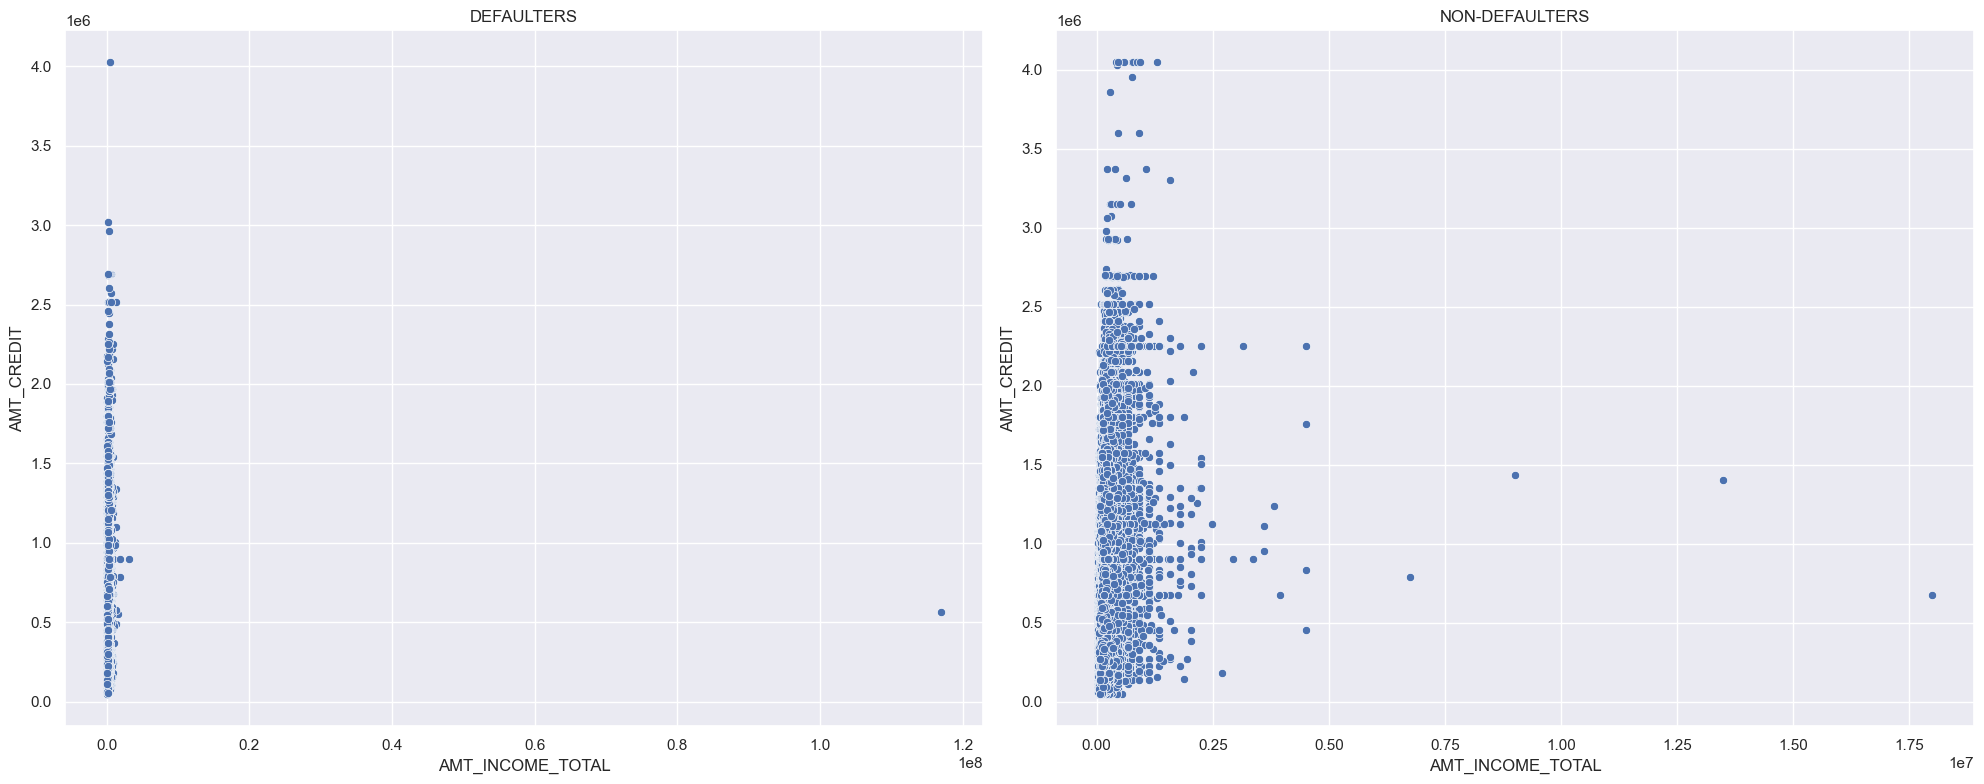

In [25]:
bivariate_scatter('AMT_INCOME_TOTAL','AMT_CREDIT')

Observations:

Payment defaulters are majority low income group people.

Also, higher credit amount is given for low income people than higher income people.

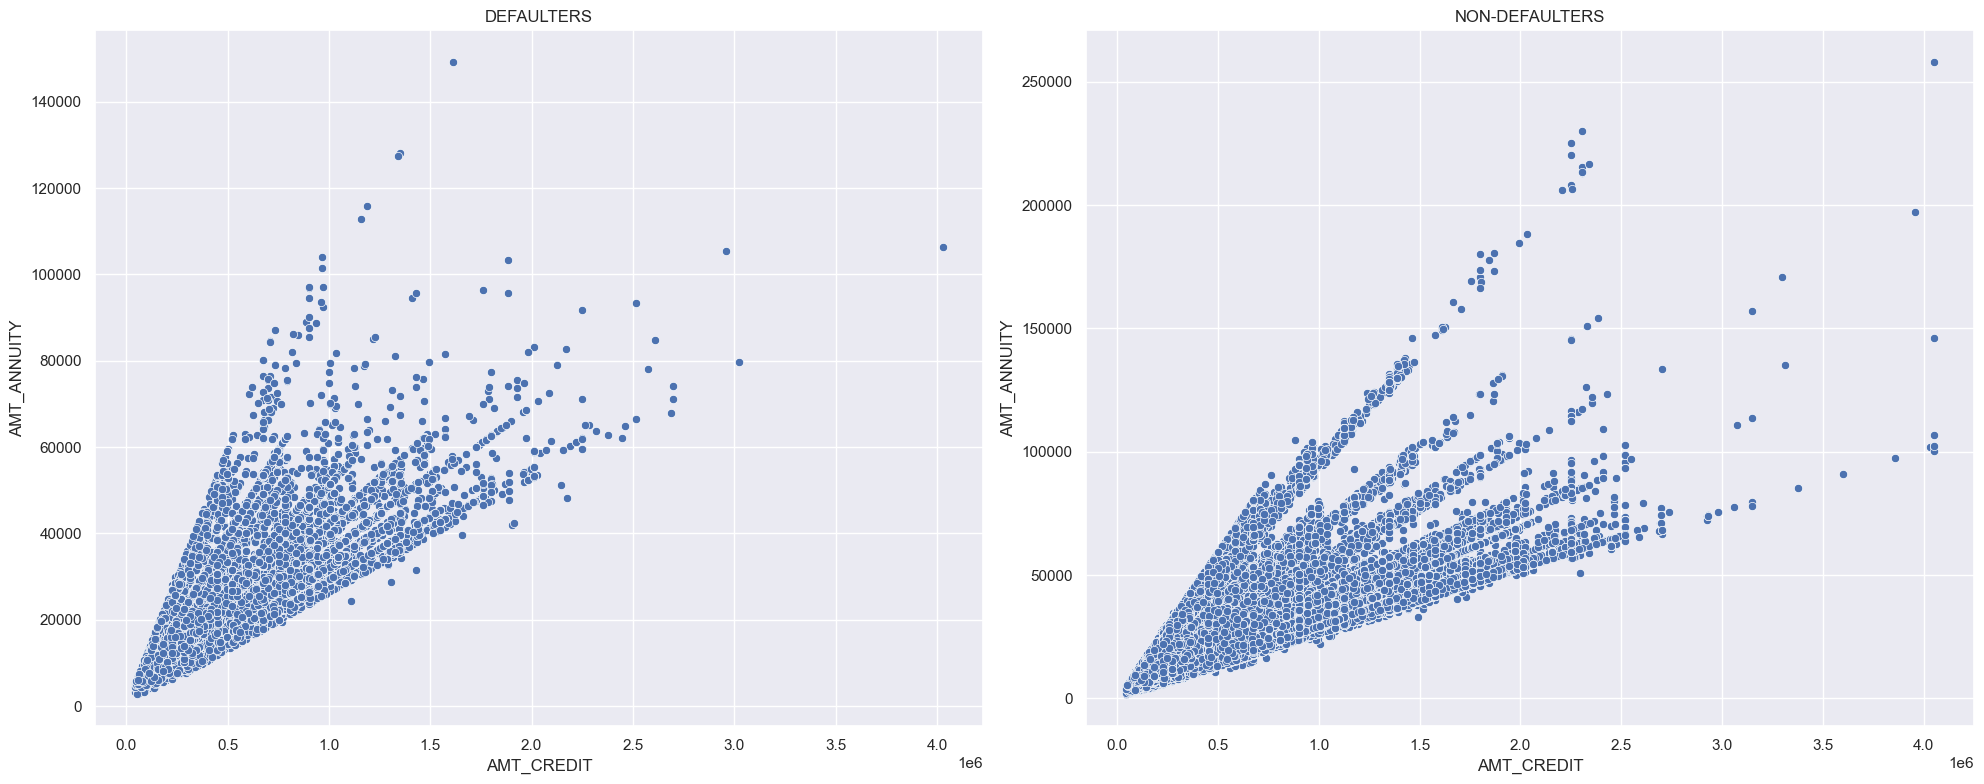

In [26]:
bivariate_scatter('AMT_CREDIT','AMT_ANNUITY')

Observations:Positive correlation observed between credit and annuity 

### Analysising the continuous variables with target variable

In [27]:
#defining plotting function for box plots
def boxplot_target(variable,label_orientation=False):
    
    #setting subplots & fig size
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,4))
    
    #plot1
    sns.boxplot(ax=ax1,data=df_app[df_app['TARGET']==1],x=variable,showfliers=False)
    ax1.set_title('DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)
    #plot2
    sns.boxplot(ax=ax2,data=df_app[df_app['TARGET']==0],x=variable,showfliers=False)
    ax2.set_title('NON-DEFAULTERS')
    if(label_orientation==True):
        plt.xticks(rotation=90)

    plt.show()

In [28]:
df_app['DAYS_EMPLOYED']=abs(df_app.DAYS_EMPLOYED)//365

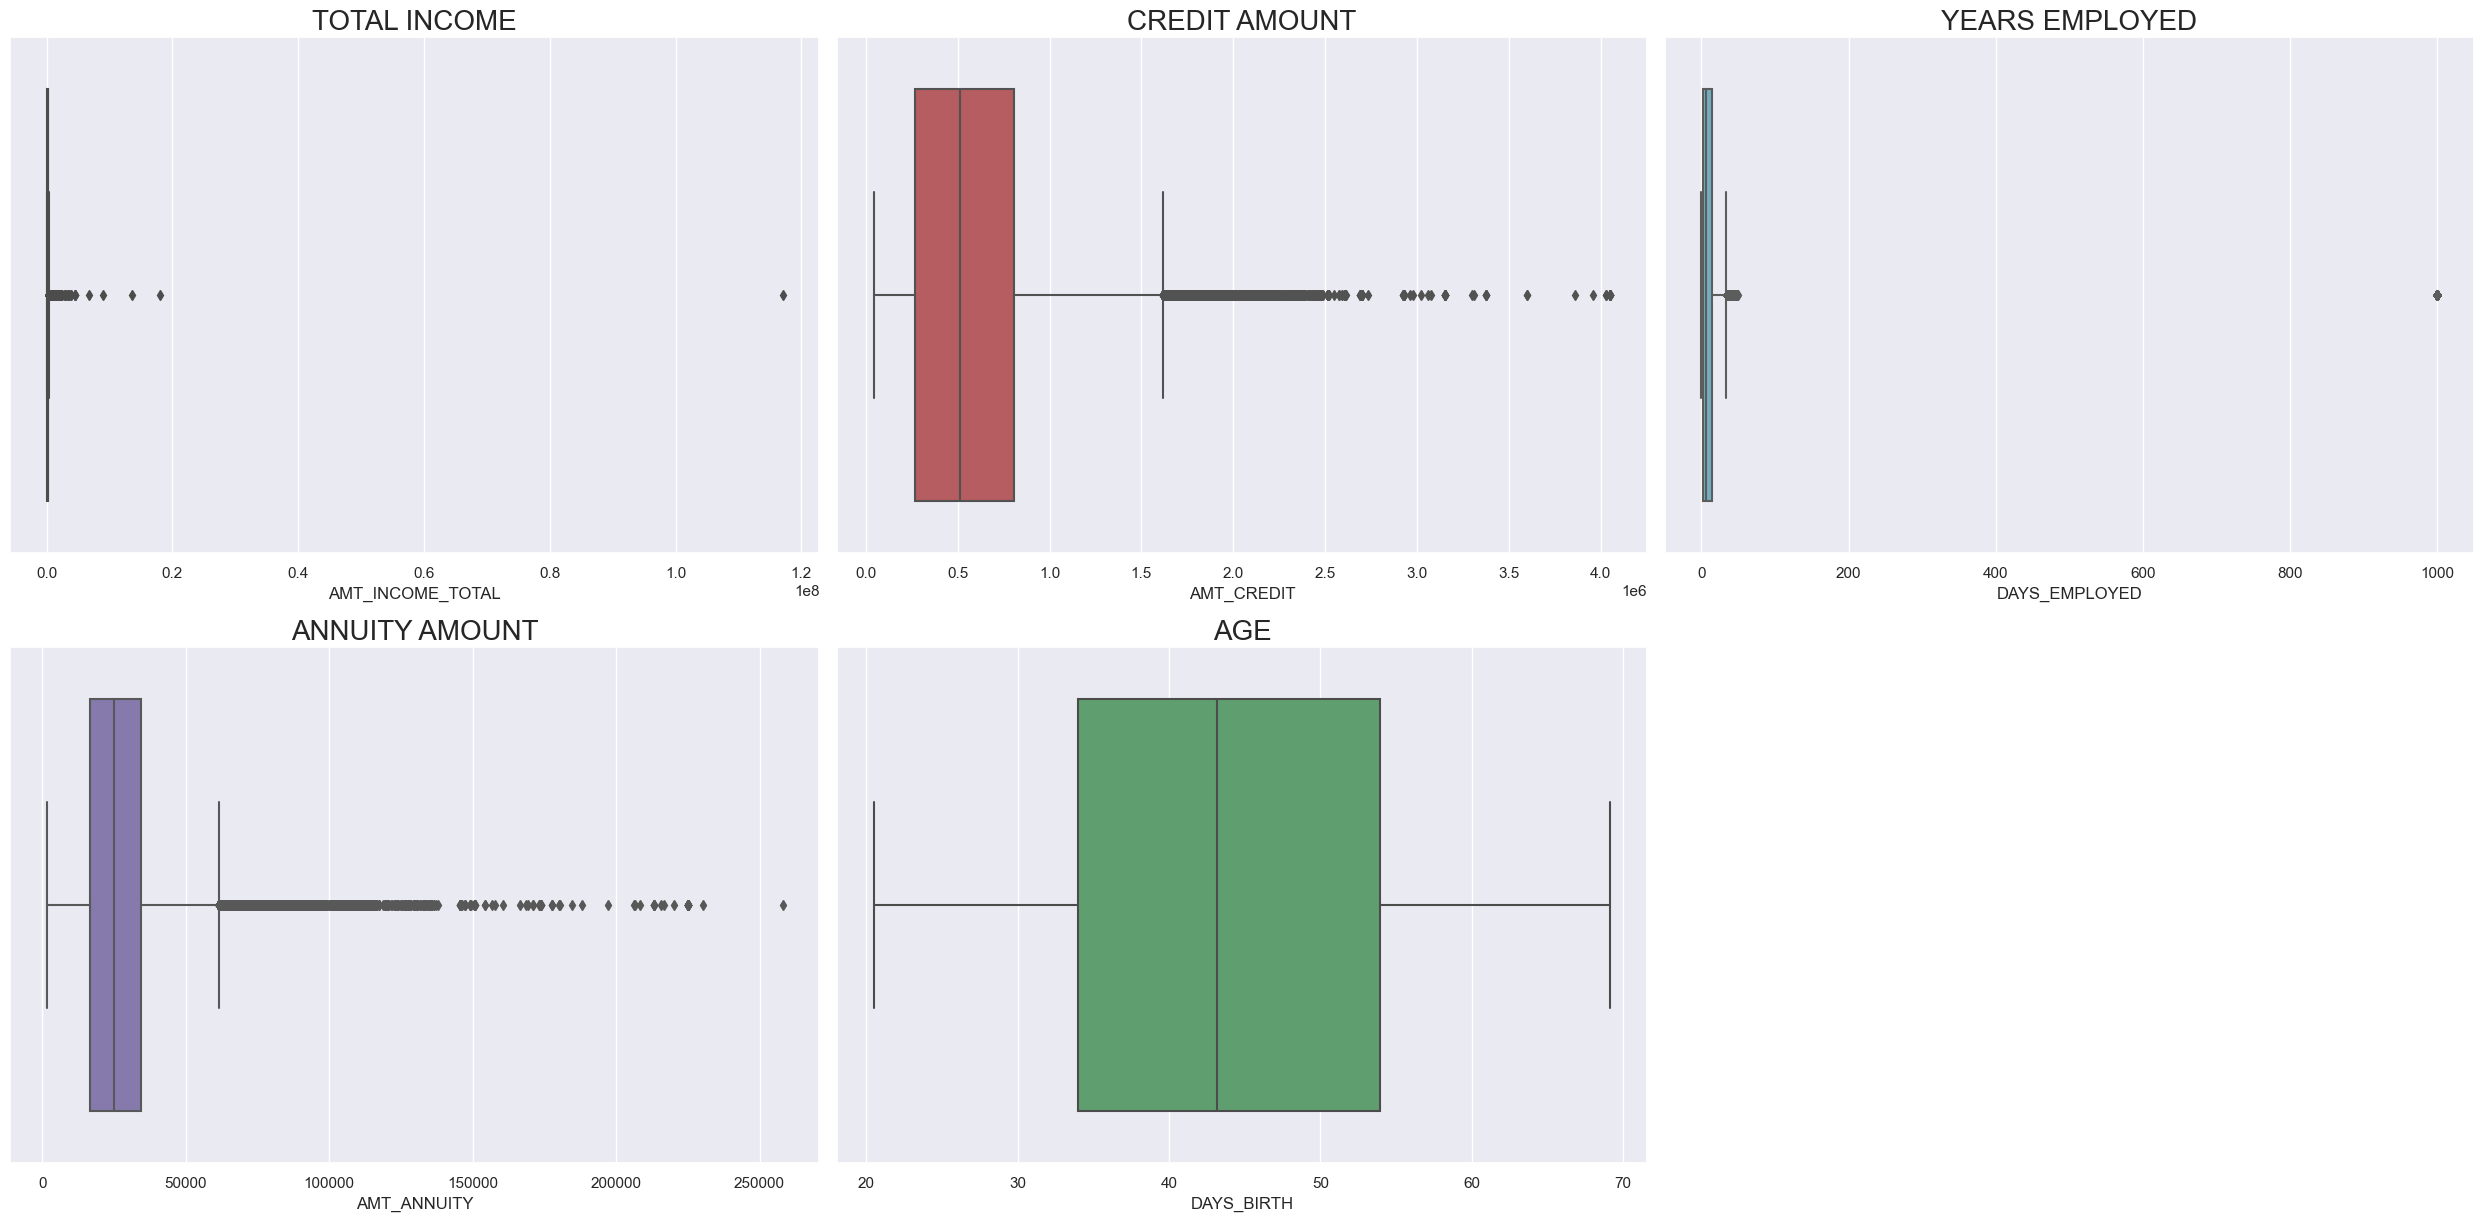

In [29]:
#Setting plot size
plt.figure(figsize = (25, 18))

#Creating Subplots

#1.Total Income
plt.subplot(3,3,1)
plt.title("TOTAL INCOME", fontsize=20)
sns.boxplot(df_app.AMT_INCOME_TOTAL,color='g')

#2.Credit Amount
plt.subplot(3,3,2)
plt.title("CREDIT AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_CREDIT,color='r')

#3.Days Employed
plt.subplot(3,3,3)
plt.title("YEARS EMPLOYED", fontsize=20)
sns.boxplot(df_app.DAYS_EMPLOYED,color='c')

#4.Annuity Amount
plt.subplot(3,3,4)
plt.title("ANNUITY AMOUNT", fontsize=20)
sns.boxplot(df_app.AMT_ANNUITY,color='m')

#5.Age
plt.subplot(3,3,5)
plt.title("AGE", fontsize=20)
sns.boxplot(abs(df_app.DAYS_BIRTH)/365,color='g')


plt.tight_layout()
plt.show()

Observation:Days of  having one outliner with value 1000 years.
Annual credit and Annual income has couple of outliners

### Days of employment with Target variable

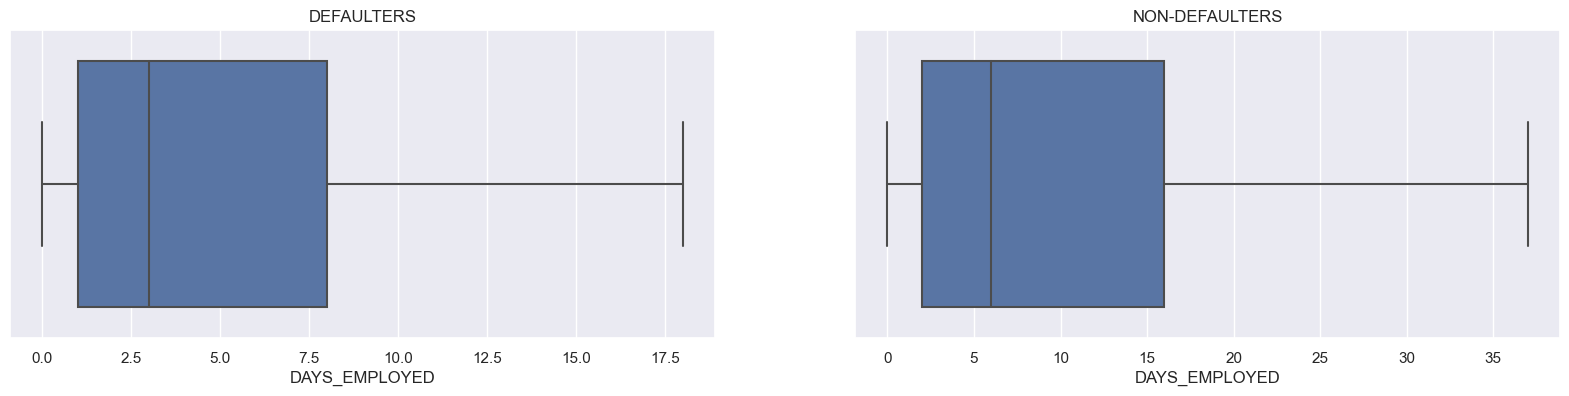

In [30]:
boxplot_target('DAYS_EMPLOYED',label_orientation=False)

Observation:Payment Defaulters have been employed for an average of less than 3 years and. having one outliner with value 1000 years
Repayers are employed for an average of 5+ years

 #### Annual Income with Target variable

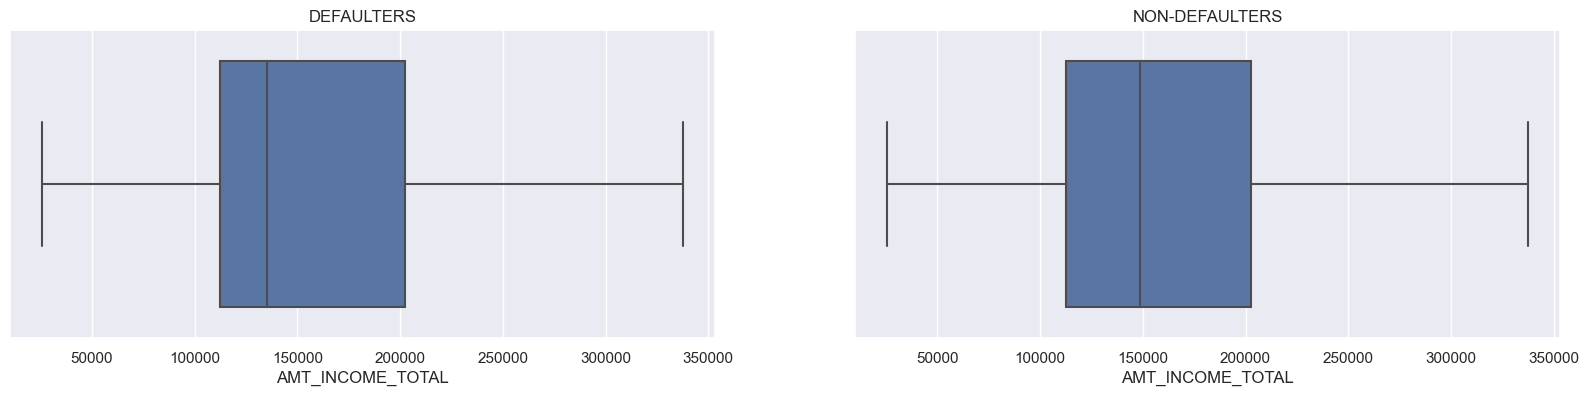

In [31]:
boxplot_target('AMT_INCOME_TOTAL',label_orientation=False)

In [32]:
#defining plotting functions
def bivariate_pivot(val,ind,col,title,label_orientation=False):
    
    #pivot table function
    table1=pd.pivot_table(data=df_app,values=val,index=ind,columns=col,aggfunc=np.mean)
    table1.plot(kind='bar',stacked='True',figsize=[20,10])
    plt.title(title)
    if(label_orientation==True):
        plt.xticks(rotation=45)
    plt.show() 
    print(table1)
    print(' ')
    print(df_app[ind].value_counts())

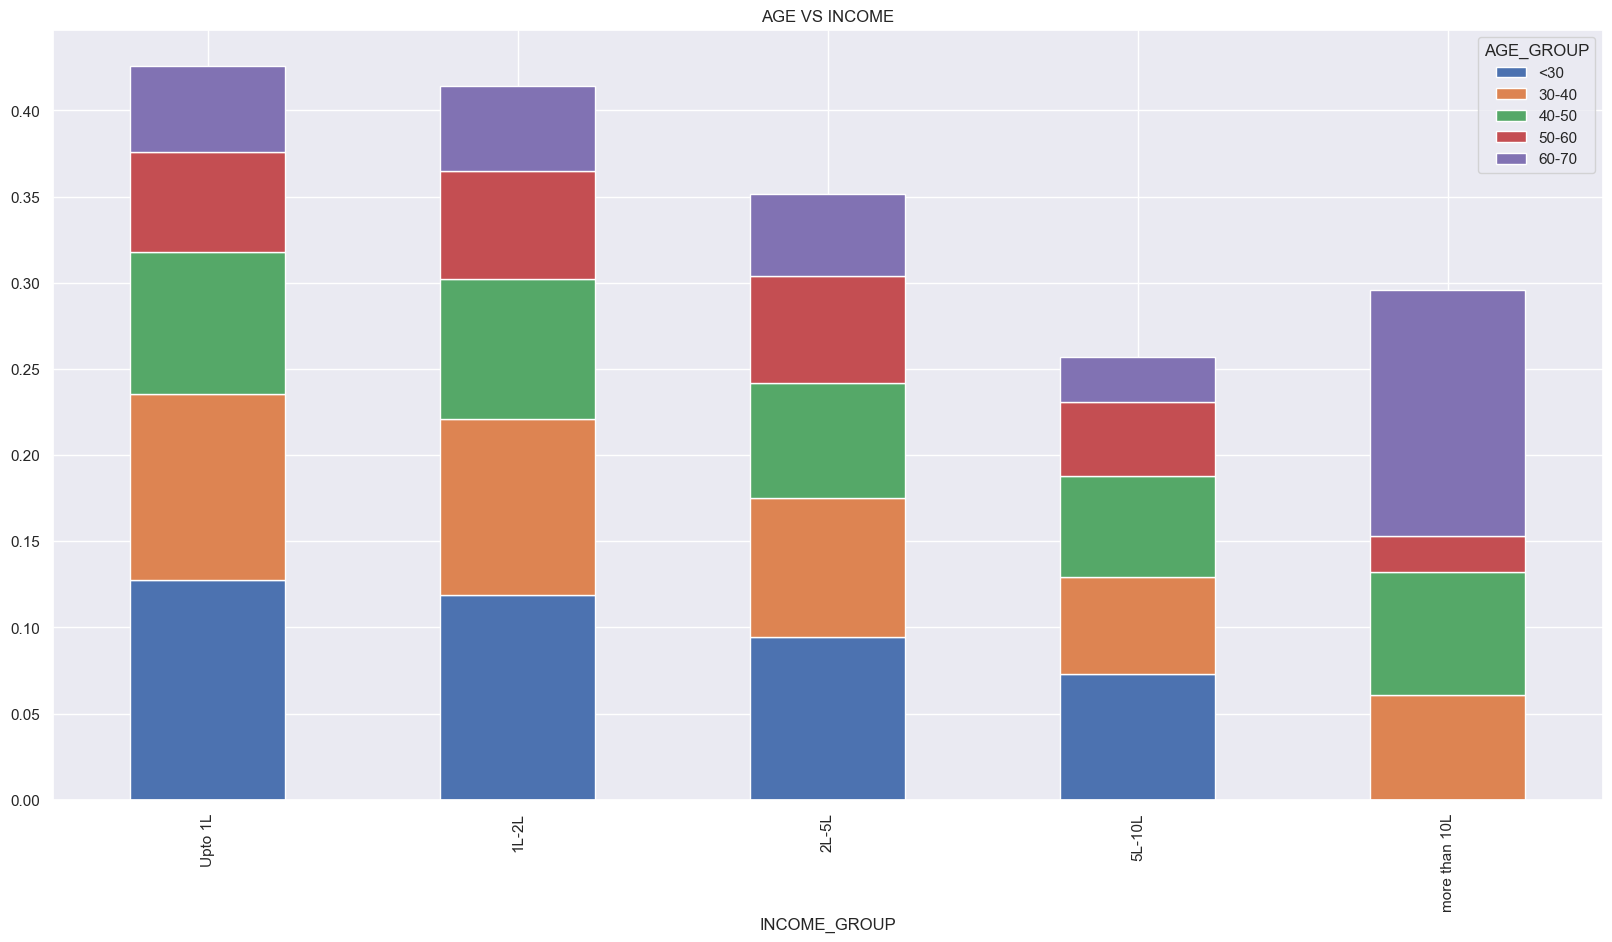

AGE_GROUP           <30     30-40     40-50     50-60     60-70
INCOME_GROUP                                                   
Upto 1L        0.127295  0.108245  0.082537  0.057893  0.049589
1L-2L          0.118899  0.101872  0.081196  0.062864  0.049541
2L-5L          0.094401  0.080520  0.066812  0.061909  0.047882
5L-10L         0.073171  0.056051  0.058612  0.042969  0.026316
more than 10L  0.000000  0.060976  0.071429  0.020408  0.142857
 
1L-2L            155898
2L-5L             85213
Upto 1L           63698
5L-10L             2452
more than 10L       250
Name: INCOME_GROUP, dtype: int64


In [33]:
bivariate_pivot("TARGET",'INCOME_GROUP','AGE_GROUP','AGE VS INCOME')

Observation: Age group of <30 earning less than 1Lakh are most likely to have payment difficulties.
Income group 5L-10L shows the least chances of payment difficulty.
Income group 'more than 10L' are outliers, thus considering them as isolated events.

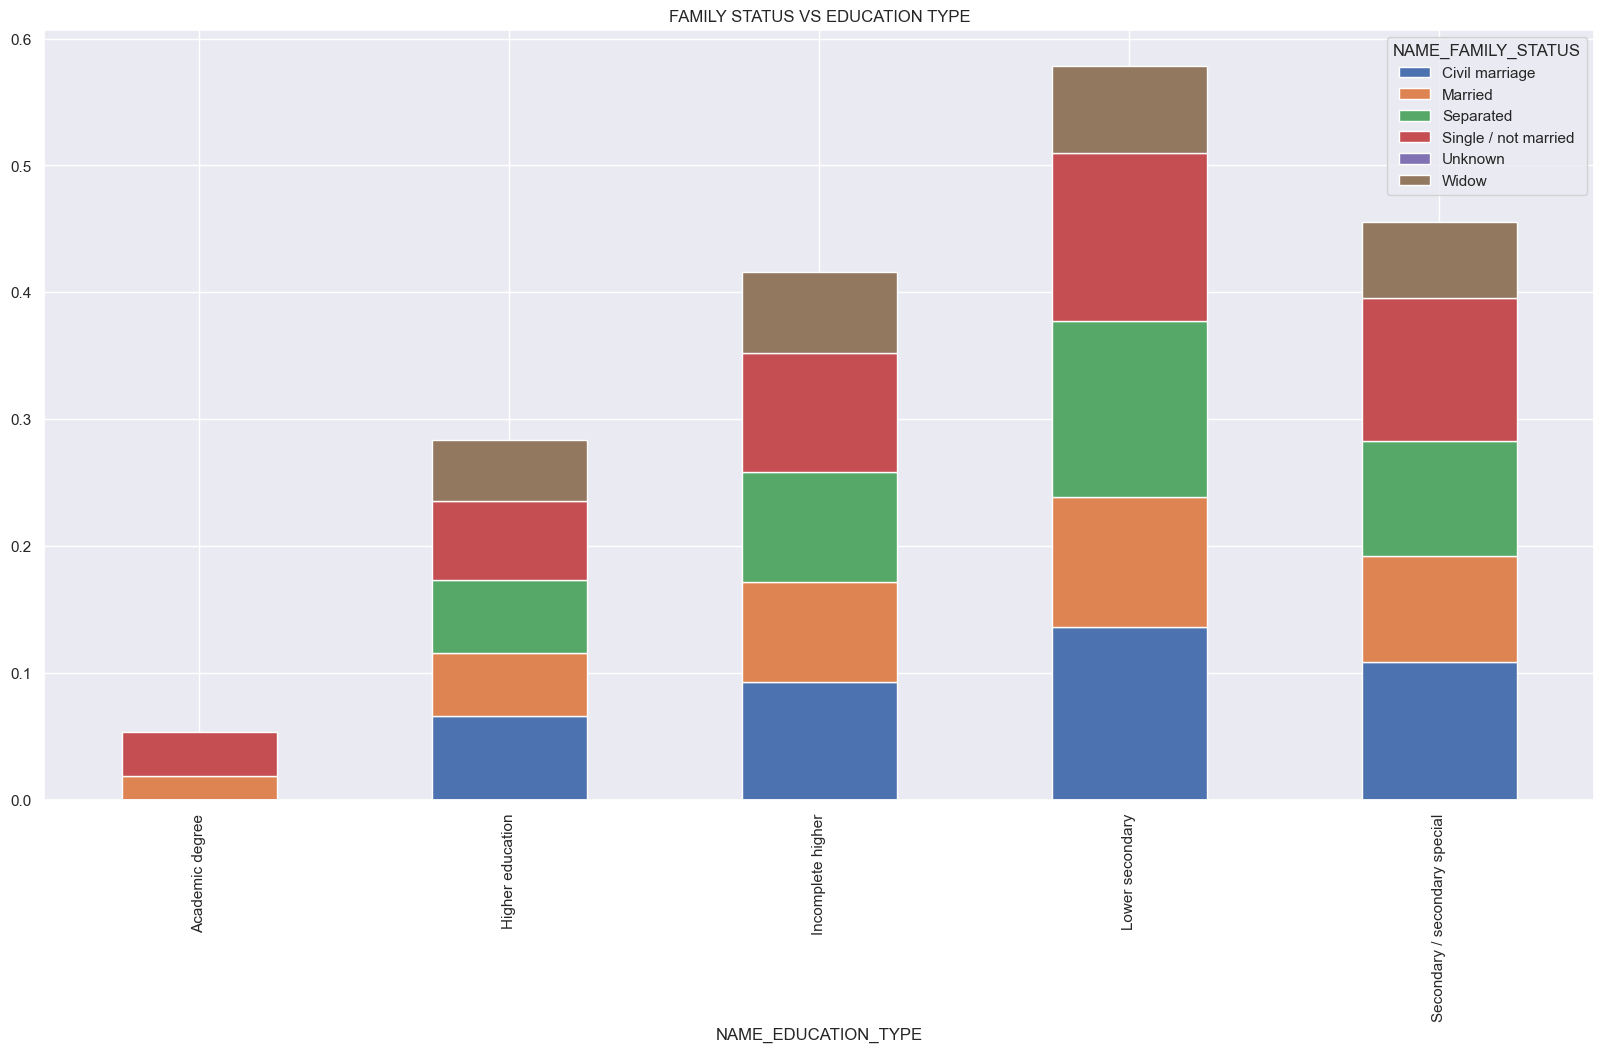

NAME_FAMILY_STATUS             Civil marriage   Married  Separated  \
NAME_EDUCATION_TYPE                                                  
Academic degree                      0.000000  0.018868   0.000000   
Higher education                     0.066196  0.049646   0.057346   
Incomplete higher                    0.092481  0.079144   0.086643   
Lower secondary                      0.135922  0.102961   0.138249   
Secondary / secondary special        0.108322  0.084136   0.089904   

NAME_FAMILY_STATUS             Single / not married  Unknown     Widow  
NAME_EDUCATION_TYPE                                                     
Academic degree                            0.034483      NaN  0.000000  
Higher education                           0.062049      0.0  0.048094  
Incomplete higher                          0.094143      NaN  0.063584  
Lower secondary                            0.132988      0.0  0.067961  
Secondary / secondary special              0.113243      NaN  0.059666 

In [34]:
bivariate_pivot("TARGET",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','FAMILY STATUS VS EDUCATION TYPE')

Observation:
    Lower secondary education-Civil Marriage & Single people are the most risky category exhibiting payment difficulty.
Widows have shown less percentage of payment difficulty through all Education types.
Academic degree Education type shows less chances of payment difficulty.

# Defining the problem statement:
1. Problem statement
Create a Predictive model which can tell if application contract status is sucessful or not ?

    Target Variable: Contract_Status
   

    Successful=1 Application is successful
    Unsuccessful=0 Application is successful

## Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

## Looking at the distribution of Target variable

 

In [35]:
unique_values = df_pre["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [36]:
# Replace categorical variables to numeric values
df_pre["NAME_CONTRACT_STATUS"]=df_pre["NAME_CONTRACT_STATUS"].map({"Approved":1,"Refused":0,"Canceled":0,"Unused offer":0})

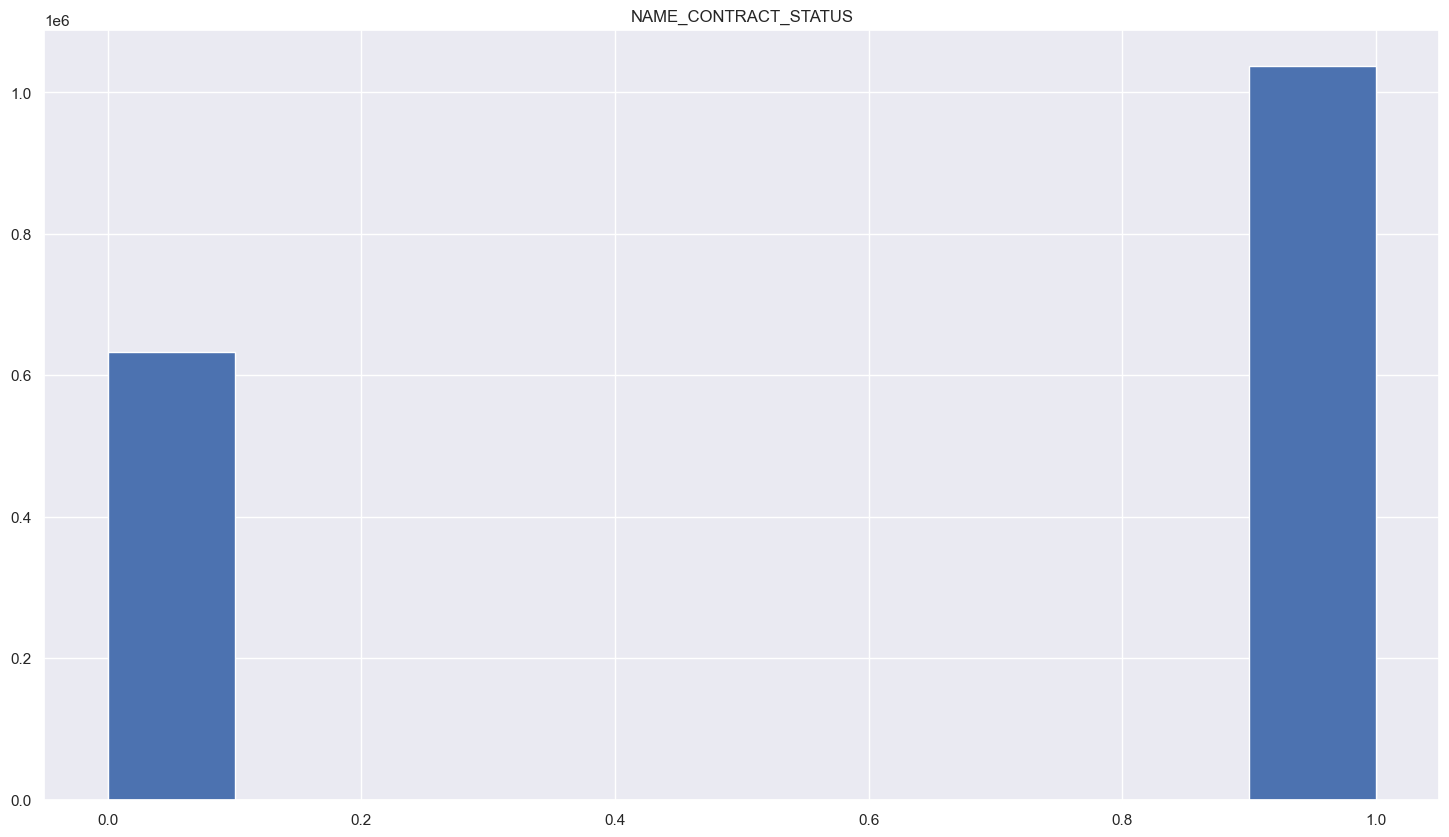

In [37]:
# Plotting histograms of multiple columns together
df_pre.hist(["NAME_CONTRACT_STATUS"], figsize=(18,10));

# Defining the problem statement:
2. Problem statement
Create a Predictive model which can tell if application Target status - late payment/Defaulters  or not ?

    Target Variable: Target
   

    Defaulter=1 -late payment of loan
    non_Defaulter=0 -non late payment of loan

## Determining the type of Machine Learning

Based on the problem statement, we need to create a supervised ML Classification  model, as the target variable is Categorical.

## Looking at the distribution of Target variable

 

In [38]:
#Defining a function for univariate-categorical plots
def univariate_cat_df_app(variable,Title,label_orientation=False):

    plt.figure(figsize=(7,7))
    sns.countplot(data=df_app,x=variable,order=df_app[variable].value_counts().index)
    plt.title(Title)
    
    if(label_orientation==True):
        plt.xticks(rotation=90)

    plt.show()

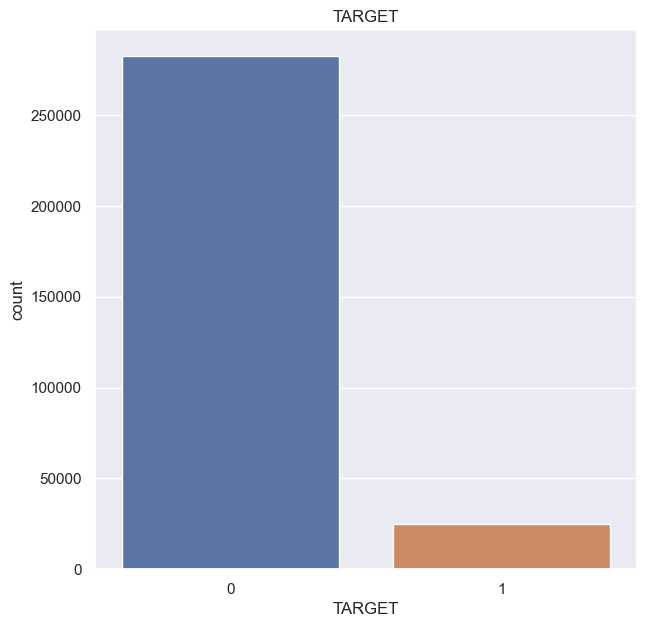

In [39]:
#Distribution of Target-defaulters who availed a Loan.
univariate_cat_df_app('TARGET','TARGET')

# Data Preparation

## Importing the dataset and combining two datasets
Two datasets (application_data and previous_application) are merged based on column that is common to both datasets - "SK_ID_CURR". I saved this new dataset as "merged_dataset".

In [40]:
df1 = pd.read_csv('application_data.csv')
df2 = pd.read_csv('previous_application.csv')

df = pd.merge(df1, df2, on='SK_ID_CURR', how='left')

df.to_csv('merged_dataset.csv', index=False)


## Visual Exploratory Data Analysis
after merging the dataset and analysis the Contract status- target variable

In [41]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

Bivariate Analysis with Contract_status Variable 

### I will set the Pandas display format for floating point numbers to two decimal places

In [42]:
pd.options.display.float_format = '{:.2f}'.format

In [43]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1430150,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,675000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.05,-16856,-1262,-5128.00,-410,NaN,1,1,1,1,1,0,Laborers,2.00,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.73,0.71,0.11,0.07,0.05,0.99,NaN,0.02,0.08,0.07,0.38,NaN,NaN,NaN,0.08,NaN,0.00,0.08,0.05,0.99,NaN,0.02,0.08,0.07,0.38,NaN,NaN,NaN,0.08,NaN,0.00,0.07,0.05,0.99,NaN,0.02,0.08,0.07,0.38,NaN,NaN,NaN,0.08,NaN,0.00,NaN,block of flats,0.07,Panel,No,0.00,0.00,0.00,0.00,-787.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,1.00,2073384.00,Cash loans,16400.61,229500.00,254340.00,NaN,229500.00,THURSDAY,12.00,Y,1.00,NaN,NaN,NaN,XNA,Approved,-648.00,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.00,XNA,24.00,middle,Cash X-Sell: middle,365243.00,-618.00,72.00,-558.00,-528.00,1.00
1430151,456255,0,Cash loans,F,N,N,0,157500.00,675000.00,49117.50,675000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.05,-16856,-1262,-5128.00,-410,NaN,1,1,1,1,1,0,Laborers

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


In [45]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430062.00,1428936.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,482581.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430153.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,623757.00,1428254.00,1184536.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,711456.00,597759.00,739099.00,483279.00,434653.00,673878.00,716767.00,725136.00,463595.00,584695.00,455811.00,719154.00,440320.00,647178.00,746347.00,1426762.00,1426762.00,1426762.00,1426762.00,1430154.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1430155.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1264343.00,1413701.00,1106483.00,1413701.00,1413700.00,664161.00,1094176.00,1413701.00,1413701.00,664161.00,4791.00,4791.00,1413701.00,1413701.00,1106488.00,852595.00,852595.00,852595.00,852595.00,852595.00,852595.00
mean,278470.25,0.09,0.40,173603.62,589338.59,27042.03,529443.48,0.02,-16314.95,68602.09,-5001.28,-3034.49,11.97,1.00,0.81,0.18,1.00,0.28,0.07,2.15,2.06,2.04,11.99,0.01,0.04,0.04,0.07,0.22,0.17,0.51,0.51,0.49,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.22,0.23,0.07,0.10,0.10,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.14,0.22,0.23,0.06,0.10,0.10,0.01,0.03,0.12,0.09,0.98,0.75,0.04,0.07,

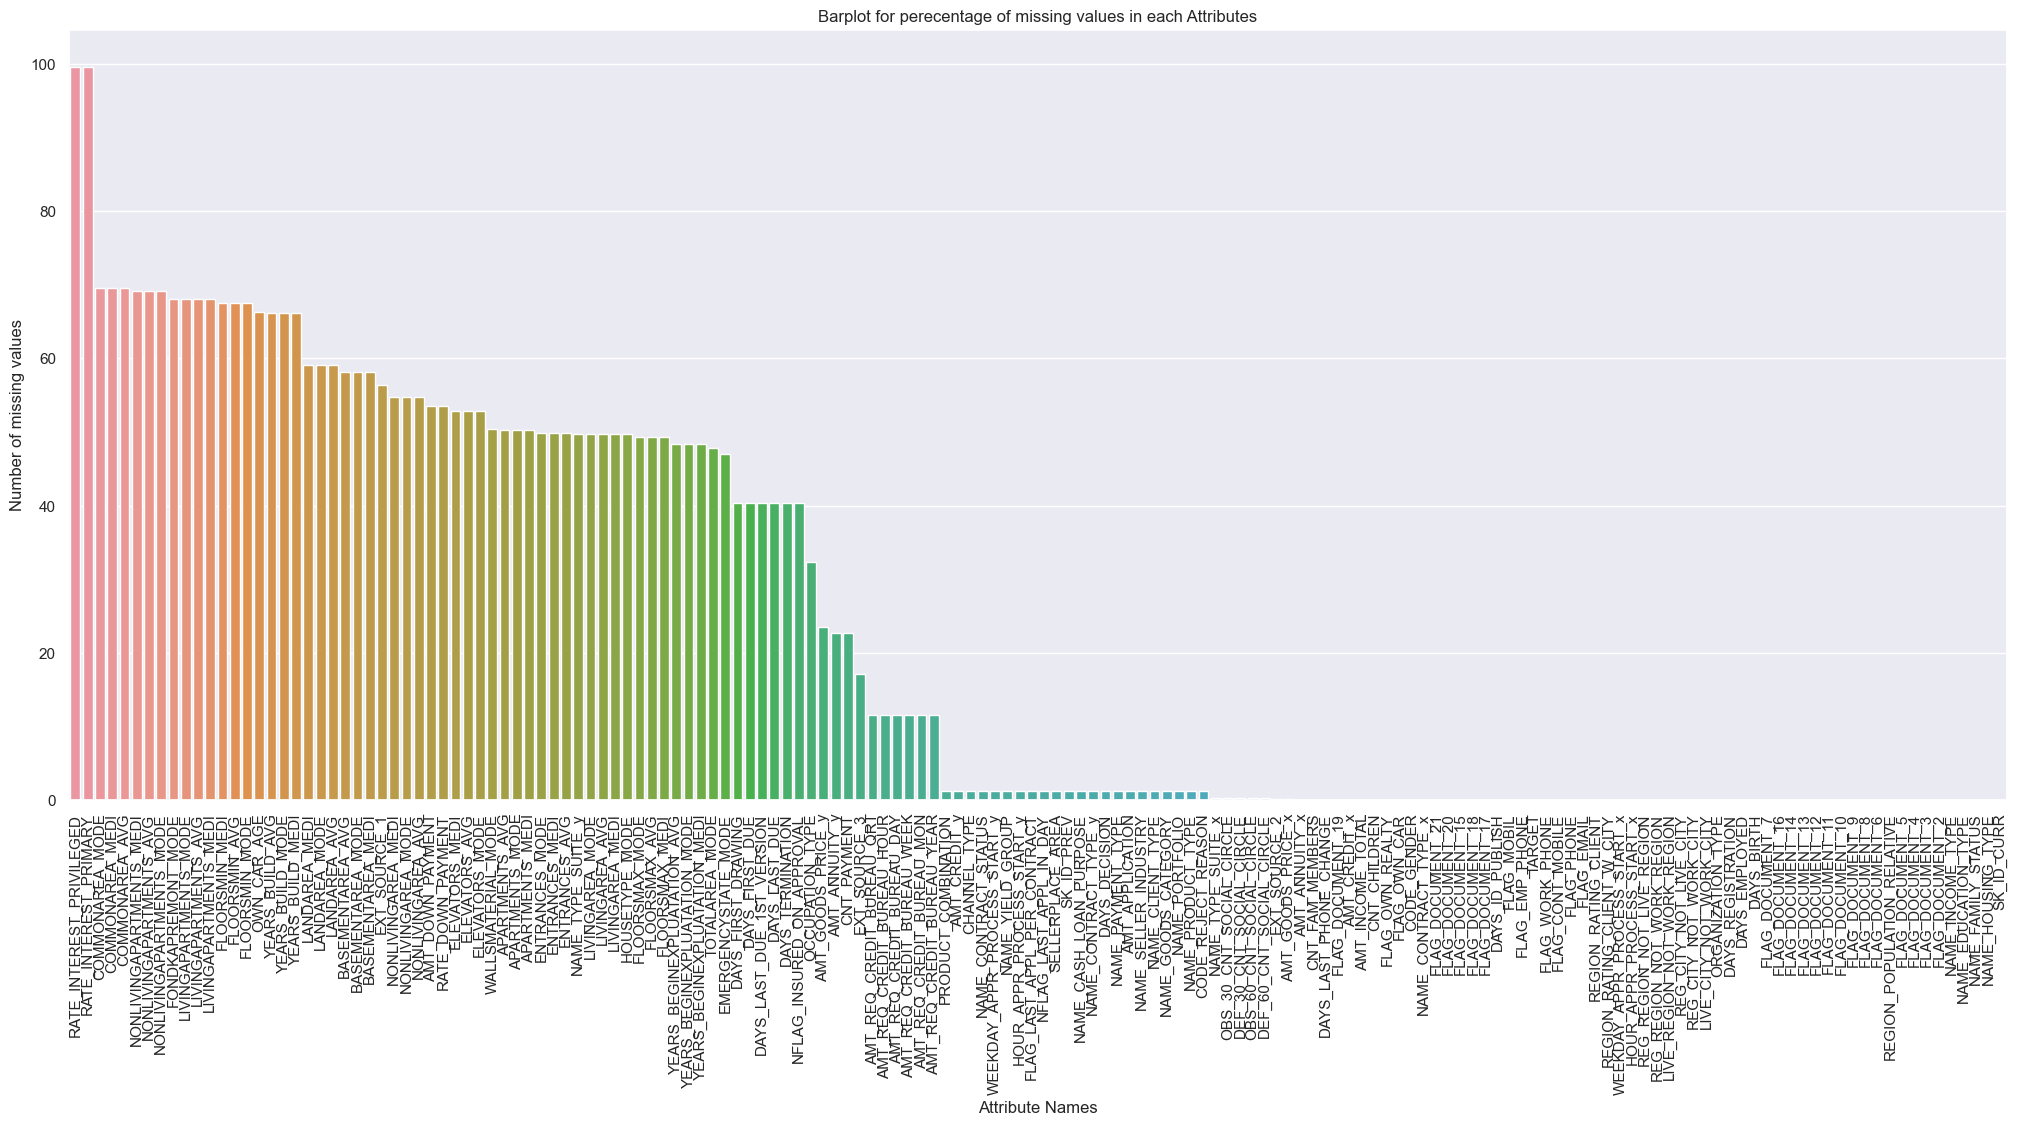

In [46]:
##Barplot on missing values viaulaization column with maximizing missing values
##Missing percentage = Total missing value per attributes/ total nulber of missing values in the dataset

cols_miss_perc = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 10))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each Attributes')
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

# 

Since we still have high number of columns (94), I decided to list all the columns and create new dataframe with columns I find relevant for further work.

In [47]:
column_names = df.columns.tolist()

print(column_names)

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONA

## Feature Selections

In [48]:
df = df[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 25 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1430155 non-null  int64  
 1   TARGET                      1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        1430155 non-null  object 
 3   CODE_GENDER                 1430155 non-null  object 
 4   FLAG_OWN_CAR                1430155 non-null  object 
 5   FLAG_OWN_REALTY             1430155 non-null  object 
 6   CNT_CHILDREN                1430155 non-null  int64  
 7   AMT_INCOME_TOTAL            1430155 non-null  float64
 8   AMT_CREDIT_x                1430155 non-null  float64
 9   AMT_ANNUITY_x               1430062 non-null  float64
 10  NAME_INCOME_TYPE            1430155 non-null  object 
 11  NAME_EDUCATION_TYPE         1430155 non-null  object 
 12  NAME_FAMILY_STATUS          1430155 non-null  object 
 1

### Now we have new dataset with 25 columns and 1430154 rows.

In [50]:
#pip install ydata-profiling

## Removing NaN values.


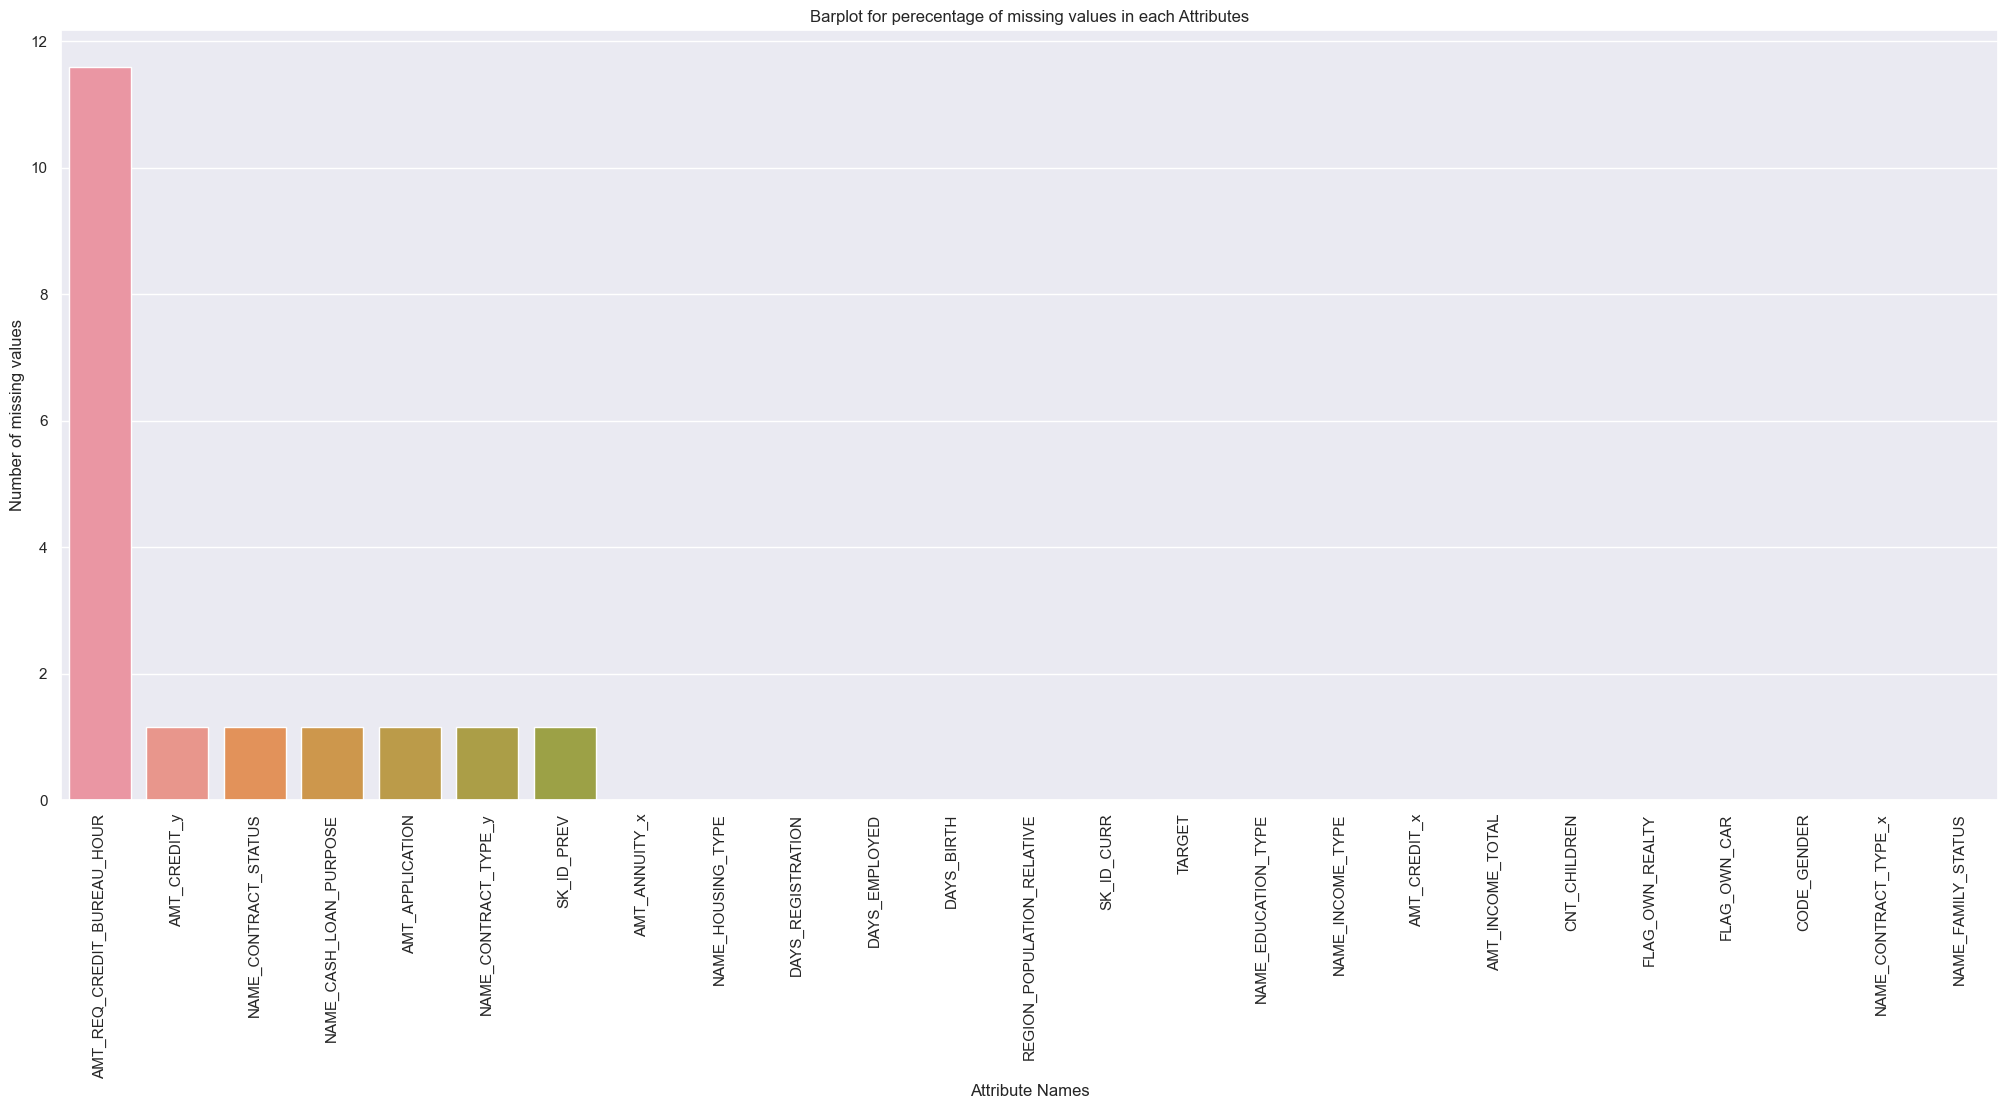

In [51]:
##Barplot on missing values viaulaization column with maximizing missing values
##Missing percentage = Total missing value per attributes/ total nulber of missing values in the dataset

cols_miss_perc = (df.isnull().sum()*100/df.shape[0]).sort_values(ascending = False)
plt.figure(figsize=(25, 10))
sns.barplot(x =cols_miss_perc.index, y =cols_miss_perc)
plt.title('Barplot for perecentage of missing values in each Attributes')
plt.xlabel('Attribute Names')
plt.xticks(rotation=90)
plt.ylabel('Number of missing values')
plt.show()

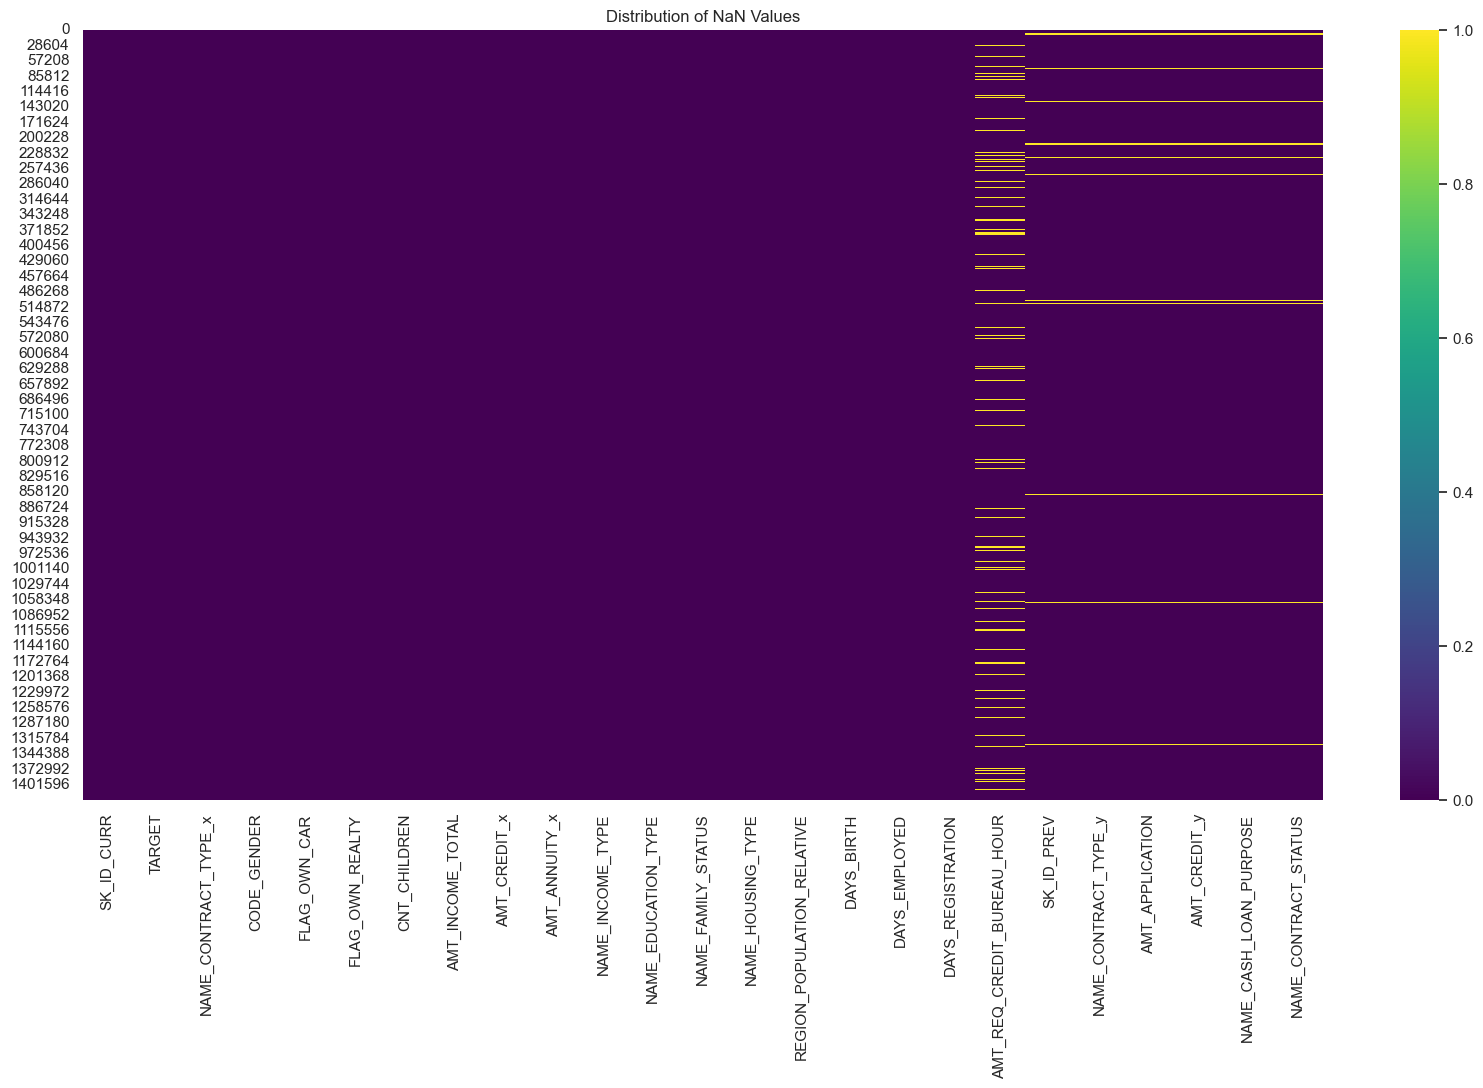

In [52]:
missing_values = df.isnull().sum()

plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Distribution of NaN Values')
plt.show()

### Removing rows with NaN values
Since we had dataset with more than million rows, there was no issue with dropping certain amount of rows and reducing the size of the dataset.
First, I checked number of NaN values:

In [53]:
total_NaN_number = df.isna().sum().sum()
total_NaN_number

264630

### After that, I dropped rows with NaN values:

In [54]:
df = df.dropna()

In [55]:
total_NaN_number = df.isna().sum().sum()

total_NaN_number

0

# 

## Removing duplicates
One more thing I decided to check on this dataset is number of duplicated rows, since I merged two datasets based on SK_ID_CURR column. I will check how many rows have duplicated ID and will remove those rows as well.

In [56]:
duplicates = df['SK_ID_CURR'].duplicated()
num_duplicates = duplicates.sum()
num_duplicates

998275

In [57]:
df = df.drop_duplicates(subset=['SK_ID_CURR'], keep='first')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251712 entries, 0 to 1430147
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  251712 non-null  int64  
 1   TARGET                      251712 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        251712 non-null  object 
 3   CODE_GENDER                 251712 non-null  object 
 4   FLAG_OWN_CAR                251712 non-null  object 
 5   FLAG_OWN_REALTY             251712 non-null  object 
 6   CNT_CHILDREN                251712 non-null  int64  
 7   AMT_INCOME_TOTAL            251712 non-null  float64
 8   AMT_CREDIT_x                251712 non-null  float64
 9   AMT_ANNUITY_x               251712 non-null  float64
 10  NAME_INCOME_TYPE            251712 non-null  object 
 11  NAME_EDUCATION_TYPE         251712 non-null  object 
 12  NAME_FAMILY_STATUS          251712 non-null  object 
 13  NAME_HOUSING_

### Our finalised dataset consist of 251712 rows in 25 columns.

# 

### Converting negative values to absolute values

In [58]:
cols_with_negative = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']

df[cols_with_negative] = df[cols_with_negative].abs()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved
14,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved
20,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved


## Replacing categorical variables with numerical values

In [59]:
df = df.replace({'N': 0, 'Y': 1})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,0,1,0,202500.00,406597.50,24700.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,0.00,1038818.00,Consumer loans,179055.00,179055.00,XAP,Approved
1,100003,0,Cash loans,F,0,0,0,270000.00,1293502.50,35698.50,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,0.00,1810518.00,Cash loans,900000.00,1035882.00,XNA,Approved
4,100004,0,Revolving loans,M,1,1,0,67500.00,135000.00,6750.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,0.00,1564014.00,Consumer loans,24282.00,20106.00,XAP,Approved
14,100007,0,Cash loans,M,0,1,0,121500.00,513000.00,21865.50,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,0.00,2001242.00,Cash loans,180000.00,180000.00,XNA,Approved
20,100008,0,Cash loans,M,0,1,0,99000.00,490495.50,27517.50,State servant,Secondary / secondary special,Married,House / apartment,0.04,16941,1588,4970.00,0.00,2218188.00,Consumer loans,162598.50,162598.50,XAP,Approved


### Getting number and names of the object columns

In [60]:
obj_cols = df.select_dtypes(include='object')

num_obj_cols = obj_cols.shape[1]

num_obj_cols

9

In [61]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS']

### Getting all unique values for each object column 

In [62]:
unique_values = df["NAME_CONTRACT_TYPE_x"].unique()
unique_values

array(['Cash loans', 'Revolving loans'], dtype=object)

In [63]:
unique_values = df["CODE_GENDER"].unique()
unique_values

array(['M', 'F', 'XNA'], dtype=object)

In [64]:
unique_values = df["NAME_INCOME_TYPE"].unique()
unique_values

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student'], dtype=object)

In [65]:
unique_values = df["NAME_EDUCATION_TYPE"].unique()
unique_values

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [66]:
unique_values = df["NAME_FAMILY_STATUS"].unique()
unique_values

array(['Single / not married', 'Married', 'Widow', 'Civil marriage',
       'Separated'], dtype=object)

In [67]:
unique_values = df["NAME_HOUSING_TYPE"].unique()
unique_values

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [68]:
unique_values = df["NAME_CASH_LOAN_PURPOSE"].unique()
unique_values

array(['XAP', 'XNA', 'Repairs', 'Other', 'Building a house or an annex',
       'Urgent needs', 'Car repairs', 'Buying a new car', 'Medicine',
       'Furniture', 'Education', 'Buying a used car',
       'Purchase of electronic equipment', 'Everyday expenses',
       'Wedding / gift / holiday', 'Buying a holiday home / land',
       'Payments on other loans', 'Buying a home', 'Business development',
       'Journey', 'Gasification / water supply', 'Buying a garage',
       'Hobby', 'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

In [69]:
unique_values = df["NAME_CONTRACT_STATUS"].unique()
unique_values

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

### Replacing all categorical variables with numeric values

In [70]:
df = df.replace({'Cash loans': 0, 'Revolving loans': 1, 'Consumer loans':2,
                'M': 0, 'F': 1, 'XNA': 3,
                'Unemployed': 0, 'Working': 1, 'State servant': 2, 'Commercial associate': 3, 'Pensioner': 4, 'Student': 5,
                'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4,
                'Single / not married': 0, 'Married': 1, 'Widow': 2, 'Civil marriage': 3, 'Separated': 4,
                'House / apartment': 0, 'Rented apartment': 1, 'Municipal apartment': 2, 'With parents': 3, 'Office apartment': 4, 'Co-op apartment': 5,
                'XAP': 0, 'Repairs': 1, 'Other': 2, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24,
                'Refused': 0, 'Approved': 1, 'Canceled': 0, 'Unused offer': 0})
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,AMT_REQ_CREDIT_BUREAU_HOUR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,100002,1,0,0,0,1,0,202500.00,406597.50,24700.50,1,0,0,0,0.02,9461,637,3648.00,0.00,1038818.00,2,179055.00,179055.00,0,1
1,100003,0,0,1,0,0,0,270000.00,1293502.50,35698.50,2,1,1,0,0.00,16765,1188,1186.00,0.00,1810518.00,0,900000.00,1035882.00,3,1
4,100004,0,1,0,1,1,0,67500.00,135000.00,6750.00,1,0,0,0,0.01,19046,225,4260.00,0.00,1564014.00,2,24282.00,20106.00,0,1
14,100007,0,0,0,0,1,0,121500.00,513000.00,21865.50,1,0,0,0,0.03,19932,3038,4311.00,0.00,2001242.00,0,180000.00,180000.00,3,1
20,100008,0,0,0,0,1,0,99000.00,490495.50,27517.50,2,0,1,0,0.04,16941,1588,4970.00,0.00,2218188.00,2,162598.50,162598.50,0,1


### Our dataset is now completely filled with numerical values only

In [71]:
#defining plotting functions
def bivariate_pivot_contract(val,ind,col,title,label_orientation=False):
    
    
    table1=pd.pivot_table(data=df,values=val,index=ind,columns=col,aggfunc=np.mean)
    table1.plot(kind='bar',stacked='True',figsize=[20,10])
    plt.title(title)
    if(label_orientation==True):
        plt.xticks(rotation=45)
    plt.show() 
    print(table1)
    print(' ')
    print(df[ind].value_counts())

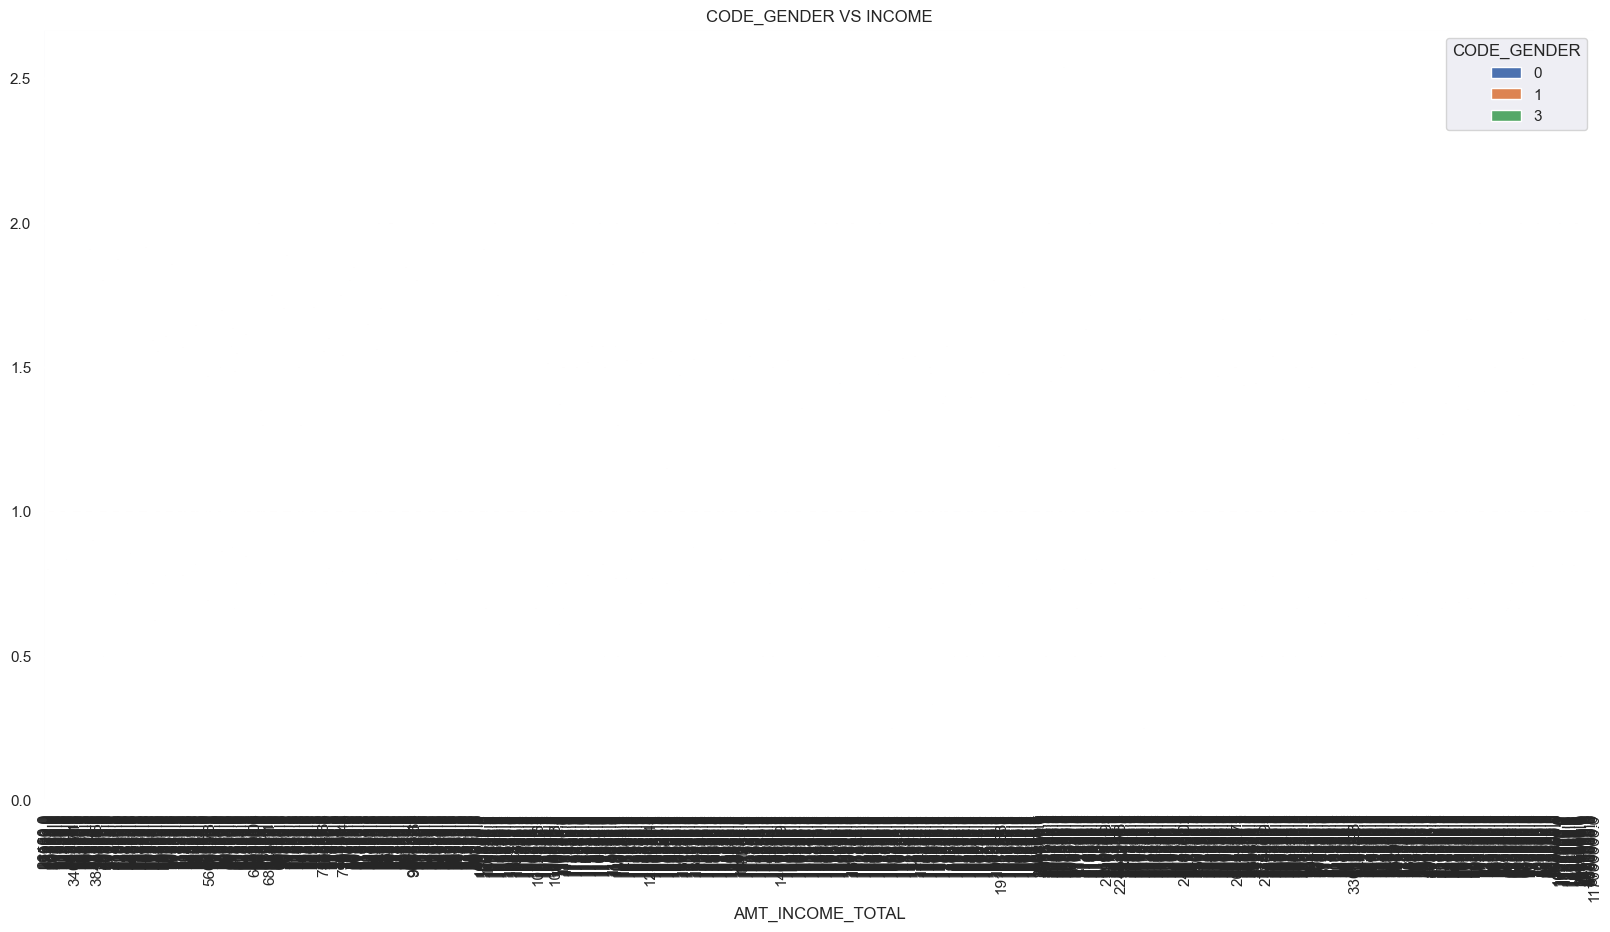

CODE_GENDER         0    1    3
AMT_INCOME_TOTAL               
26100.00          NaN 1.00  NaN
26550.00          NaN 1.00  NaN
27000.00         1.00 0.79  NaN
27900.00          NaN 0.80  NaN
28161.00         0.00  NaN  NaN
28350.00          NaN 1.00  NaN
28404.00          NaN 1.00  NaN
28575.00          NaN 1.00  NaN
28800.00          NaN 1.00  NaN
29133.00          NaN 0.00  NaN
29250.00         0.33 0.95  NaN
30150.00         1.00 1.00  NaN
30600.00         1.00 1.00  NaN
31050.00          NaN 1.00  NaN
31500.00         0.83 0.78  NaN
31531.50          NaN 0.00  NaN
31815.00          NaN 1.00  NaN
31860.00         1.00  NaN  NaN
31950.00          NaN 1.00  NaN
31990.50          NaN 1.00  NaN
32040.00          NaN 1.00  NaN
32139.00         0.00  NaN  NaN
32220.00          NaN 0.00  NaN
32400.00          NaN 0.83  NaN
32625.00          NaN 1.00  NaN
32850.00         0.50 1.00  NaN
32967.00          NaN 1.00  NaN
33165.00          NaN 1.00  NaN
33214.50         0.00  NaN  NaN
33300.00

In [72]:
bivariate_pivot_contract("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL','CODE_GENDER','CODE_GENDER VS INCOME')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251712 entries, 0 to 1430147
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  251712 non-null  int64  
 1   TARGET                      251712 non-null  int64  
 2   NAME_CONTRACT_TYPE_x        251712 non-null  int64  
 3   CODE_GENDER                 251712 non-null  int64  
 4   FLAG_OWN_CAR                251712 non-null  int64  
 5   FLAG_OWN_REALTY             251712 non-null  int64  
 6   CNT_CHILDREN                251712 non-null  int64  
 7   AMT_INCOME_TOTAL            251712 non-null  float64
 8   AMT_CREDIT_x                251712 non-null  float64
 9   AMT_ANNUITY_x               251712 non-null  float64
 10  NAME_INCOME_TYPE            251712 non-null  int64  
 11  NAME_EDUCATION_TYPE         251712 non-null  int64  
 12  NAME_FAMILY_STATUS          251712 non-null  int64  
 13  NAME_HOUSING_

## List of replacements in dataset

#### NAME_CONTRACT_TYPE_x
Cash loans: 0, Revolving loans: 1, Consumer loans: 2
#### CODE_GENDER
M: 0, F: 1, XNA: 3
#### NAME_INCOME_TYPE
Unemployed: 0, Working: 1, State servant: 2, Commercial associate: 3, Pensioner: 4, Student: 5
#### NAME_EDUCATION_TYPE
Secondary / secondary special: 0, Higher education: 1, Incomplete higher: 2, Lower secondary: 3, Academic degree: 4
#### NAME_FAMILY_STATUS
Single / not married: 0, Married: 1, Widow: 2, Civil marriage: 3, Separated: 4
#### NAME_HOUSING_TYPE
House / apartment: 0, Rented apartment: 1, Municipal apartment: 2, With parents: 3, Office apartment: 4, Co-op apartment: 5
#### NAME_CASH_LOAN_PURPOSE
XAP: 0, 'Repairs': 1, 'Other': 2, XNA: 3, 'Building a house or an annex': 4, 'Urgent needs': 5, 'Car repairs': 6, 'Medicine': 7, 'Furniture': 8, 'Education': 9, 'Buying a used car': 10, 'Purchase of electronic equipment': 11, 'Everyday expenses': 12, 'Wedding / gift / holiday': 13, 'Buying a holiday home / land': 14, 'Buying a home': 15, 'Payments on other loans': 16, 'Business development': 17, 'Buying a new car': 18, 'Journey': 19, 'Gasification / water supply': 20, 'Buying a garage': 21, 'Hobby': 22, 'Money for a third person': 23, 'Refusal to name the goal': 24
#### NAME_CONTRACT_STATUS
'Approved': 1, 'Refused': 0, 'Canceled': 0, 'Unused offer': 0 (NAME_CONTRACT_STATUS is our target column where we see if customer was successful or not with application. In this case, 1 stands for Approved and that's successful customer why all other outcomems are unsuccessful, therefore 0.)


# Objective - Predict the contract_status

In [127]:
models = ['Decision Tree','Logistic Regression', 'Random Forest', 'KNN']
Prediction=['Contract_status','Target','Target','Target']

scores = []

# Decision Tree Model

### Feature selection

In [75]:
feature_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'NAME_CASH_LOAN_PURPOSE']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [76]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

importance = rfe.ranking_
importance

array([13, 15, 14,  9,  5,  2,  1, 11, 10,  7, 12,  4,  1,  1,  1, 16,  6,
        3,  1,  8])

In [77]:
# Create a list of column names
col_names = X.columns

# Create a list of tuples containing column names and their rankings
feat_ranks = list(zip(col_names, rfe.ranking_))

# Sort the list by ascending order of ranking
feat_ranks_sorted = sorted(feat_ranks, key=lambda x: x[1])

# Print the list of column names and their rankings
for i, (col, rank) in enumerate(feat_ranks_sorted):
    print(f"{i+1}. {col}: {rank}")

1. AMT_ANNUITY_x: 1
2. DAYS_BIRTH: 1
3. DAYS_EMPLOYED: 1
4. DAYS_REGISTRATION: 1
5. AMT_CREDIT_y: 1
6. AMT_CREDIT_x: 2
7. AMT_APPLICATION: 3
8. REGION_POPULATION_RELATIVE: 4
9. AMT_INCOME_TOTAL: 5
10. NAME_CONTRACT_TYPE_y: 6
11. NAME_FAMILY_STATUS: 7
12. NAME_CASH_LOAN_PURPOSE: 8
13. CNT_CHILDREN: 9
14. NAME_EDUCATION_TYPE: 10
15. NAME_INCOME_TYPE: 11
16. NAME_HOUSING_TYPE: 12
17. CODE_GENDER: 13
18. FLAG_OWN_REALTY: 14
19. FLAG_OWN_CAR: 15
20. AMT_REQ_CREDIT_BUREAU_HOUR: 16


In [78]:
feature_cols = ['AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'AMT_CREDIT_y', 'AMT_APPLICATION', 'REGION_POPULATION_RELATIVE', 'AMT_INCOME_TOTAL']
X = df[feature_cols]             
y = df.NAME_CONTRACT_STATUS               

print(X, y)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Splitting dataset into training set and test set (70% training and 30% test)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [80]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 8), (251712,), (176198, 8), (75514, 8), (176198,), (75514,))

In [81]:
clsf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

clsf = clsf.fit(X_train, y_train)

y_pred = clsf.predict(X_test)

### Evaluating Model - how often is the classifier correct?

In [82]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8760627168472072


In [83]:
scores.append(clsf.score(X_test,y_test))

### Calculating Train and Test score

In [84]:
train_score = clsf.score(X_train, y_train)
print("Training set score:", train_score)

test_score = clsf.score(X_test, y_test)
print("Test set score:", test_score)

Training set score: 0.877478745502219
Test set score: 0.8760627168472072


Scores are relatively close to each other and the difference between them is not significant. That means, it is less likely that the model is overfitting or underfitting. 

In [85]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

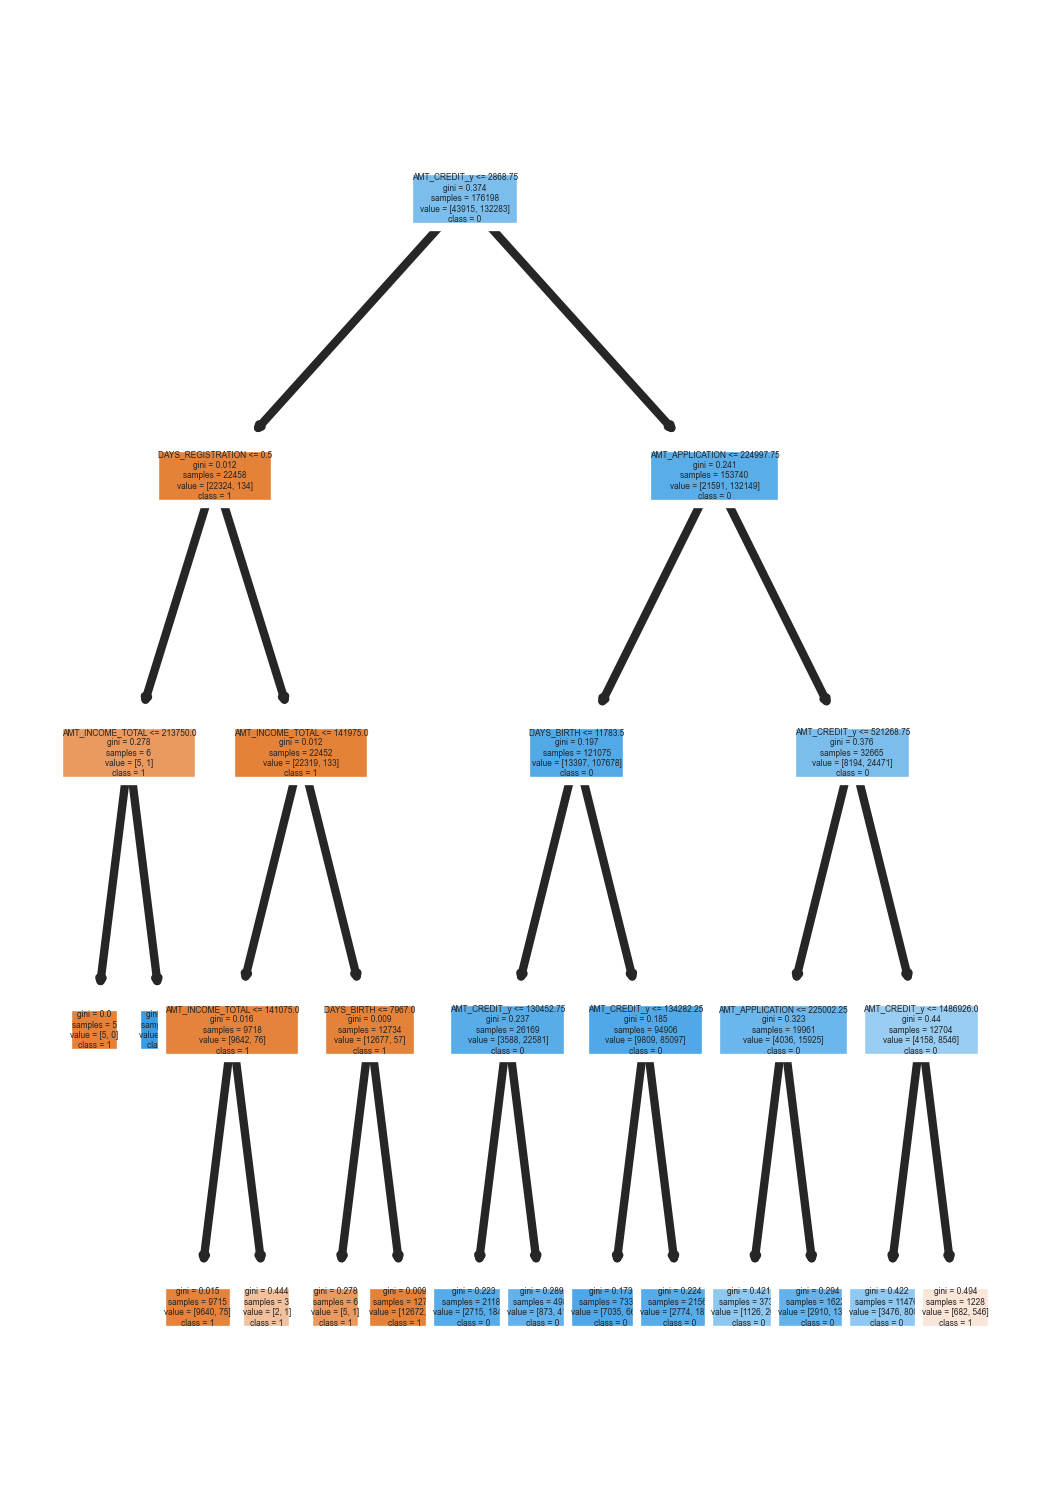

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(2, 3), dpi=600)
tree.plot_tree(clsf, feature_names=feature_cols, class_names=df.NAME_CONTRACT_STATUS.unique().astype('str'), ax=axes, filled=True);
plt.show()

# PCA
Before starting with PCA, I will scale the data.

In [87]:
#Divide the dataset in X and y according to the dependent variable "TARGET".
X=df.drop('TARGET', axis=1)
y=df['TARGET']

In [88]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251712, 24), (251712,), (188784, 24), (62928, 24), (188784,), (62928,))

In [89]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.93170692 -0.31683361  0.70743549 ... -0.49659775 -0.56117291
   0.57744813]
 [-0.16494003  3.15623083 -1.41335439 ... -0.06050537 -0.56117291
   0.57744813]
 [-0.28496035 -0.31683361 -1.41335439 ... -0.40576506 -0.56117291
   0.57744813]
 ...
 [ 0.08515009 -0.31683361  0.70743549 ...  0.11424759 -0.56117291
  -1.73175726]
 [ 0.29156289 -0.31683361  0.70743549 ... -0.20686796 -0.56117291
  -1.73175726]
 [-0.05176191 -0.31683361  0.70743549 ... -0.25007068 -0.56117291
   0.57744813]] 	 [[-0.09849101 -0.31683361  0.70743549 ...  0.31059367  1.12004819
   0.57744813]
 [ 0.55943884  3.15623083 -1.41335439 ... -0.46565638 -0.56117291
   0.57744813]
 [-0.82375432 -0.31683361  0.70743549 ... -0.18560399  1.12004819
   0.57744813]
 ...
 [-0.04386033 -0.31683361  0.70743549 ... -0.6209393   1.12004819
  -1.73175726]
 [ 0.25595236 -0.31683361 -1.41335439 ... -0.53194992 -0.56117291
   0.57744813]
 [ 0.90449363 -0.31683361  0.70743549 ... -0.21113063 -0.56117291
   0.57744813]] 	 [[-1.7298985

In [90]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components = 20)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (251712, 24)
Reduced shape: (251712, 20)


In [91]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.23593176 0.09778841 0.08138251 0.06352726 0.04917687 0.04135683
 0.03986078 0.03574929 0.03455154 0.03369734 0.03335838 0.03320271
 0.03244995 0.03021938 0.02731968 0.02650926 0.02582696 0.02128384
 0.02068347 0.01442387]


In [92]:
#pip install mglearn

Text(0, 0.5, 'cumulative explained variance')

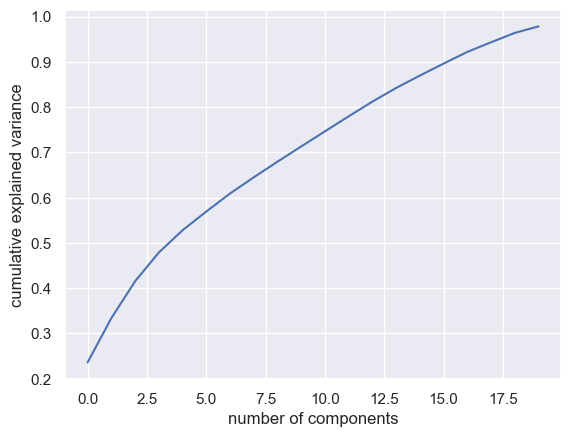

In [93]:
#apply PCA to determinate principle components which hold 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

<AxesSubplot:>

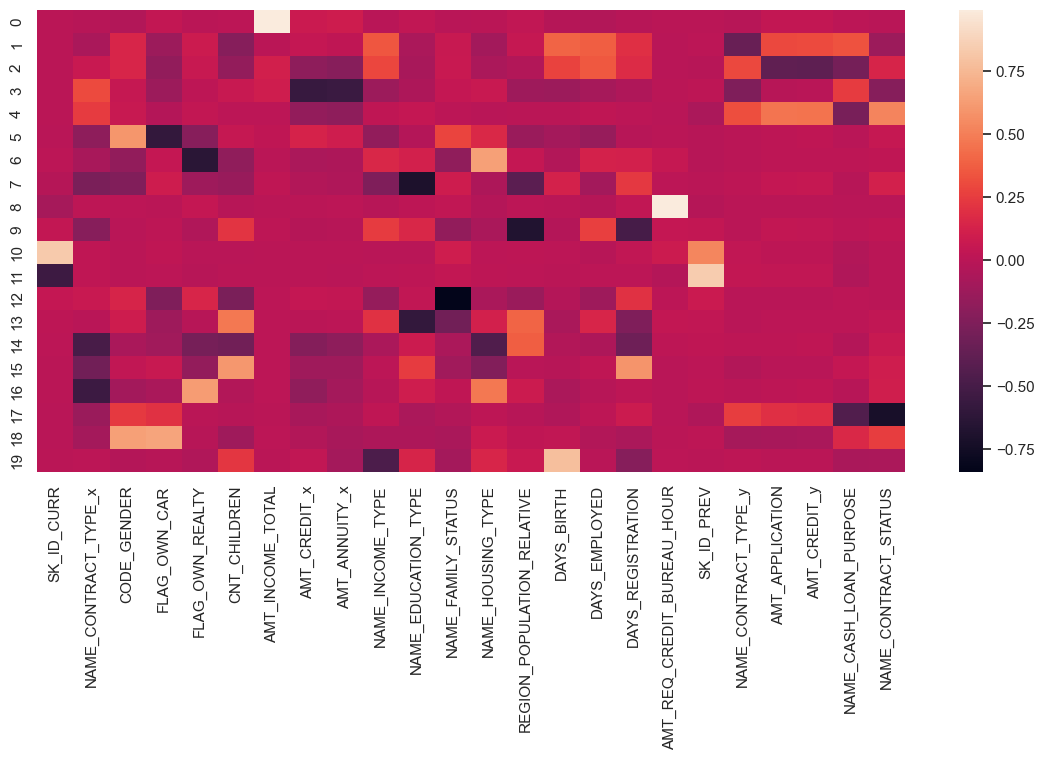

In [94]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = X.columns)
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

# Model Building
# Objective 1 - fitting Classification model to predict the target value.

Logistic Regression



In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_scaled, y_train)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[57967,     0],
       [ 4961,     0]])

In [96]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.9211638698194762 0.0


In [97]:
#!pip install imblearn
#!pip install --upgrade scikit-learn
#!pip install --upgrade threadpoolctl

In [98]:
# SMOTE - applying SMOTE to balance the datapoint since target variable has more 'No' datapoints than 'Yes'
from imblearn.over_sampling import SMOTE 

smt = SMOTE()

X_train_bal, y_train_bal = smt.fit_resample(X_train_scaled, y_train)

In [99]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred)

array([[35258, 22709],
       [ 2013,  2948]])

In [100]:
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(accuracy, recall)

0.607138316806509 0.5942350332594235


In [101]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
parameters = {
   'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
   'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, 
                   param_grid = parameters,
                   scoring = 'accuracy', 
                   cv = 3)
clf.fit(X_train_bal, y_train_bal)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [102]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',clf.best_score_,'using',clf.best_params_)

We can get accuracy of 0.6134651519591787 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [103]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.02,0.01,0.00,0.00,0.00,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,NaN,NaN,NaN,42
1,0.01,0.00,0.00,0.00,0.00,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,30
2,0.29,0.03,0.01,0.00,0.00,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.61,0.62,0.61,0.61,0.00,28
3,0.71,0.02,0.01,0.00,0.00,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.61,0.62,0.61,0.61,0.00,25
4,0.23,0.00,0.01,0.00,0.00,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.61,0.62,0.61,0.61,0.00,25
5,0.32,0.02,0.01,0.00,0.00,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.61,0.62,0.61,0.61,0.00,24
6,0.01,0.00,0.00,0.00,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,NaN,NaN,NaN,41
7,0.01,0.00,0.00,0.00,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,33
8,0.44,0.02,0.01,0.00,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.61,0.62,0.61,0.61,0.00,25
9,0.73,0.04,0.01,0.00,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.61,0.62,0.61,0.61,0.00,21


In [104]:
# LogisticRegression best fit and check the test and train accuracy 
logreg = LogisticRegression(C= 0.01, penalty='l1', solver= 'liblinear')
logreg.fit(X_train_bal, y_train_bal)

# Predict the values
y_pred1 = lr.predict(X_test_scaled)

# Call and display confusion matrix results
confusion_matrix(y_test, y_pred1)

array([[35258, 22709],
       [ 2013,  2948]])

In [105]:
accuracy = accuracy_score(y_test, y_pred1)

recall = recall_score(y_test, y_pred1)

print(accuracy, recall)

0.607138316806509 0.5942350332594235


In [106]:
scores.append(logreg.score(X_test_scaled,y_test))

Randomforest



In [107]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [108]:
# fit
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier()

RandomForestClassifier()


In [109]:
# Making predictions
predictions = rfc.predict(X_test_scaled)

In [110]:
print(confusion_matrix(y_test,predictions))

[[56869  1098]
 [ 4734   227]]


In [111]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)

0.9073226544622426 0.045756903850030235


In [112]:
#GridSearchCV to find optimal n_estimators #Takes ages to load
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

 #instantiate the model
rf = RandomForestClassifier()



In [113]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             max_features=10,
                             n_estimators=100)

In [116]:
rfc.fit(X_train_bal, y_train_bal)

RandomForestClassifier(max_depth=10, max_features=10)

In [117]:
# predict
predictions = rfc.predict(X_test_scaled)

In [118]:
accuracy = accuracy_score(y_test, predictions)

recall = recall_score(y_test, predictions)

print(accuracy,recall)


0.7594234680905162 0.36484579721830274


In [119]:
scores.append(rfc.score(X_test_scaled,y_test))

KNN Classification

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier()

In [121]:
# fit the model with the training data
model.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9230549199084668


In [124]:
scores.append(model.score(X_test,y_test))

### Evalution:

In [128]:
modelComparison = pd.DataFrame()

modelComparison['Test Score'] = scores
modelComparison['Prediction']= Prediction
modelComparison.index = models
modelComparison

,Test Score,Prediction
Decision Tree,0.88,Contract_status
Logistic Regression,0.61,Target
Random Forest,0.76,Target
KNN,0.92,Target


### Conclusion